<a href="https://colab.research.google.com/github/tonyyang0504/binance-public-data/blob/master/binance_historical_trades_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
df = pd.read_csv('/content/binance_historical_trades_data/bnbusdt_historical_trades_data.csv')
df

id   price   qty  quoteQty           time  isBuyerMaker
0      369810322  288.96  0.60   173.376  1624516840506          True
1      369810321  288.96  0.40   115.584  1624516840482         False
2      369810320  288.93  0.30    86.679  1624516840444          True
3      369810319  288.90  0.77   222.453  1624516840250          True
4      369810318  288.98  1.00   288.980  1624516840234         False
...          ...     ...   ...       ...            ...           ...
56995  369753327  288.18  3.12   899.121  1624514075599          True
56996  369753326  288.21  2.19   631.179  1624514075599          True
56997  369753325  288.21  0.02     5.764  1624514075599          True
56998  369753324  288.22  0.04    11.528  1624514075599          True
56999  369753323  288.26  0.26    74.947  1624514075392         False

[57000 rows x 6 columns]

In [3]:
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.rename(columns={'qty': 'volume'}, inplace=True)
df.drop_duplicates(inplace=True)
df.sort_values('id', inplace=True)
df.set_index('time', inplace=True)
df

id   price  volume  quoteQty  isBuyerMaker
time                                                                      
2021-06-24 05:54:35.392  369753323  288.26    0.26    74.947         False
2021-06-24 05:54:35.599  369753324  288.22    0.04    11.528          True
2021-06-24 05:54:35.599  369753325  288.21    0.02     5.764          True
2021-06-24 05:54:35.599  369753326  288.21    2.19   631.179          True
2021-06-24 05:54:35.599  369753327  288.18    3.12   899.121          True
...                            ...     ...     ...       ...           ...
2021-06-24 06:40:40.234  369810318  288.98    1.00   288.980         False
2021-06-24 06:40:40.250  369810319  288.90    0.77   222.453          True
2021-06-24 06:40:40.444  369810320  288.93    0.30    86.679          True
2021-06-24 06:40:40.482  369810321  288.96    0.40   115.584         False
2021-06-24 06:40:40.506  369810322  288.96    0.60   173.376          True

[57000 rows x 5 columns]

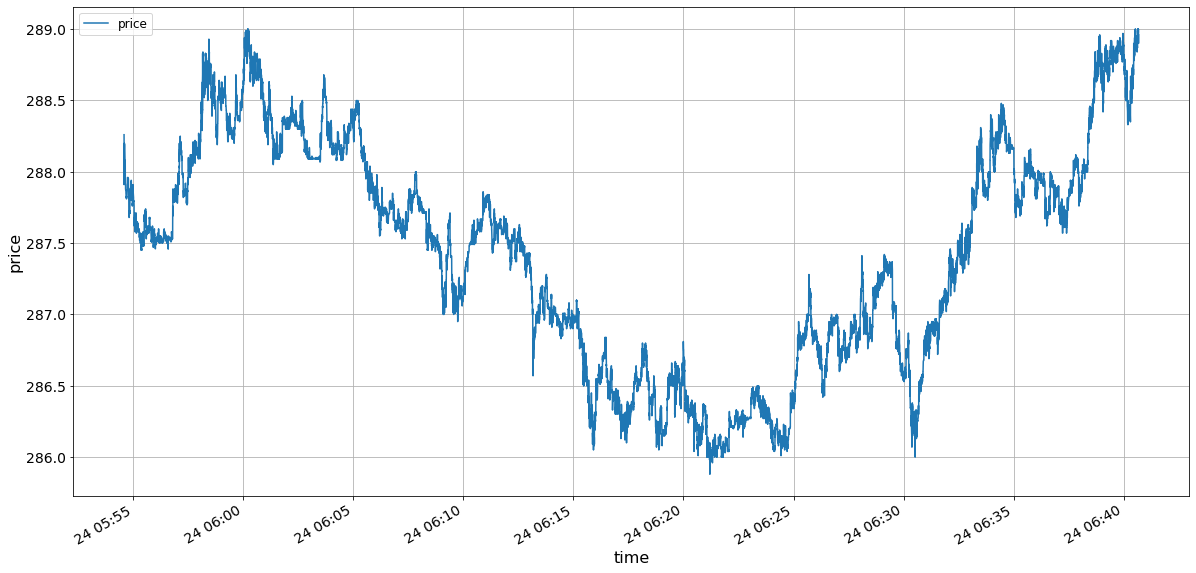

In [4]:
df.plot(y='price', grid=True, figsize=(20, 10))
plt.legend(fontsize=12)
plt.xlabel('time', size=16)
plt.ylabel('price', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

In [5]:
df['cumulative_volume'] = df['volume'].groupby(df['isBuyerMaker']).cumsum()
df

id   price  ...  isBuyerMaker  cumulative_volume
time                                        ...                                 
2021-06-24 05:54:35.392  369753323  288.26  ...         False               0.26
2021-06-24 05:54:35.599  369753324  288.22  ...          True               0.04
2021-06-24 05:54:35.599  369753325  288.21  ...          True               0.06
2021-06-24 05:54:35.599  369753326  288.21  ...          True               2.25
2021-06-24 05:54:35.599  369753327  288.18  ...          True               5.37
...                            ...     ...  ...           ...                ...
2021-06-24 06:40:40.234  369810318  288.98  ...         False           53991.03
2021-06-24 06:40:40.250  369810319  288.90  ...          True           58529.75
2021-06-24 06:40:40.444  369810320  288.93  ...          True           58530.05
2021-06-24 06:40:40.482  369810321  288.96  ...         False           53991.43
2021-06-24 06:40:40.506  369810322  288.96  ...          True           58530.65

[57000 rows x 6 columns]

In [6]:
sell_data = df.loc[df['isBuyerMaker']==True][['cumulative_volume']]
sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
sell_data

sell_cumulative_volume
time                                           
2021-06-24 05:54:35.599                    0.04
2021-06-24 05:54:35.599                    0.06
2021-06-24 05:54:35.599                    2.25
2021-06-24 05:54:35.599                    5.37
2021-06-24 05:54:35.599                    5.54
...                                         ...
2021-06-24 06:40:40.106                58528.45
2021-06-24 06:40:40.106                58528.98
2021-06-24 06:40:40.250                58529.75
2021-06-24 06:40:40.444                58530.05
2021-06-24 06:40:40.506                58530.65

[30450 rows x 1 columns]

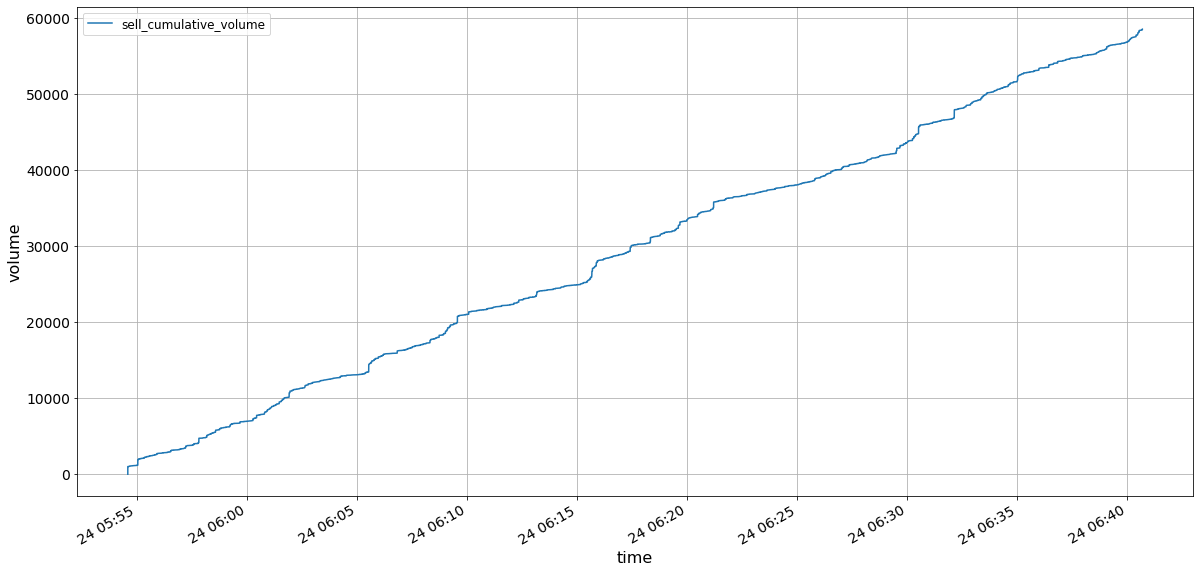

In [7]:
sell_data.plot(grid=True, figsize=(20, 10))
plt.legend(fontsize=12)
plt.xlabel('time', size=16)
plt.ylabel('volume', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

In [8]:
buy_data = df.loc[df['isBuyerMaker']==False][['cumulative_volume']]
buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
buy_data

buy_cumulative_volume
time                                          
2021-06-24 05:54:35.392                   0.26
2021-06-24 05:54:35.718                   0.60
2021-06-24 05:54:35.718                   1.54
2021-06-24 05:54:35.718                   1.94
2021-06-24 05:54:35.773                   1.98
...                                        ...
2021-06-24 06:40:40.106               53987.29
2021-06-24 06:40:40.106               53989.47
2021-06-24 06:40:40.106               53990.03
2021-06-24 06:40:40.234               53991.03
2021-06-24 06:40:40.482               53991.43

[26550 rows x 1 columns]

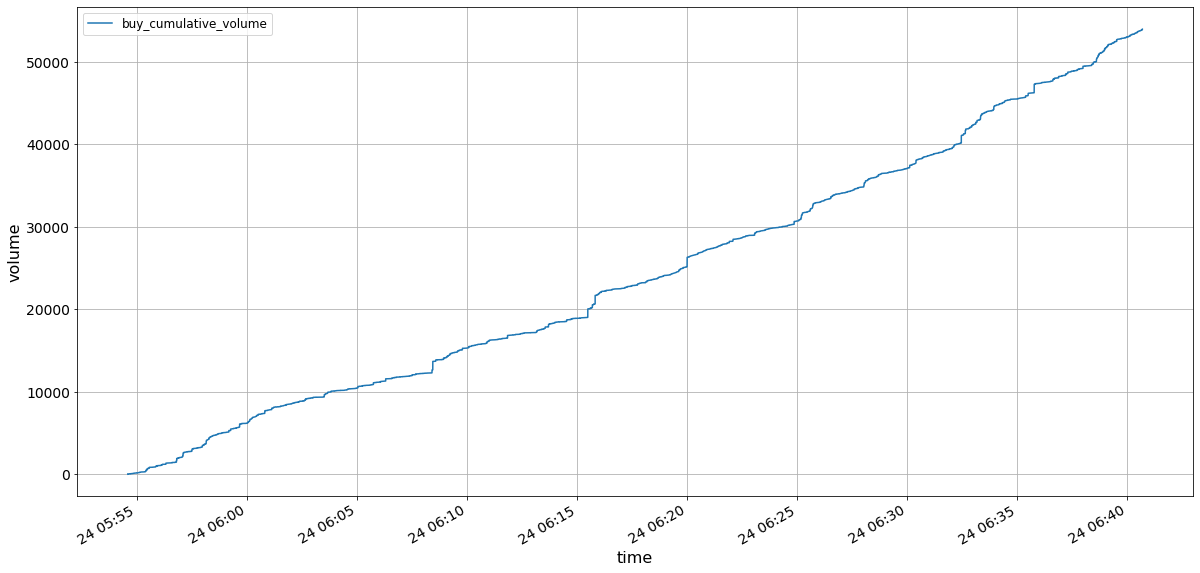

In [9]:
buy_data.plot(grid=True, figsize=(20, 10))
plt.legend(fontsize=12)
plt.xlabel('time', size=16)
plt.ylabel('volume', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

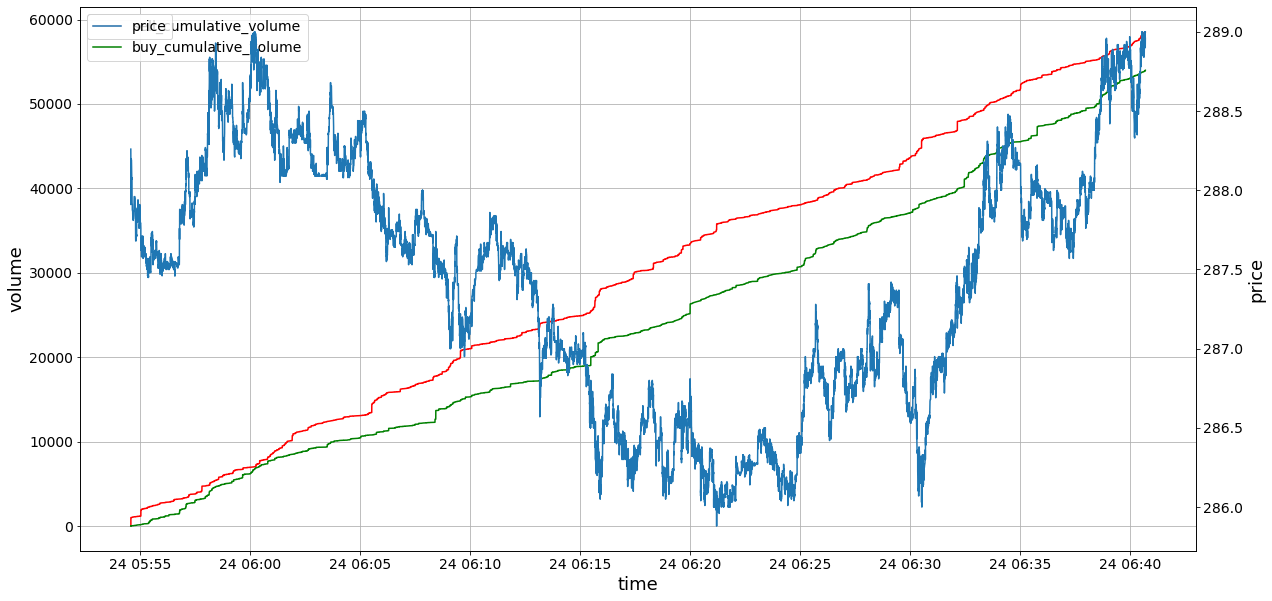

In [10]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot()
ax1.plot(sell_data, 'r', label='sell_cumulative_volume')
ax1.plot(buy_data, 'g', label='buy_cumulative_volume')
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('time', size=18)
plt.ylabel('volume', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
ax2 = ax1.twinx()
ax2.plot(df['price'], label='price')
plt.legend(fontsize=14)
plt.ylabel('price', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

In [11]:
data = pd.merge(sell_data, buy_data, how='outer', left_index=True, right_index=True)
data

sell_cumulative_volume  buy_cumulative_volume
time                                                                  
2021-06-24 05:54:35.392                     NaN                   0.26
2021-06-24 05:54:35.599                    0.04                    NaN
2021-06-24 05:54:35.599                    0.06                    NaN
2021-06-24 05:54:35.599                    2.25                    NaN
2021-06-24 05:54:35.599                    5.37                    NaN
...                                         ...                    ...
2021-06-24 06:40:40.234                     NaN               53991.03
2021-06-24 06:40:40.250                58529.75                    NaN
2021-06-24 06:40:40.444                58530.05                    NaN
2021-06-24 06:40:40.482                     NaN               53991.43
2021-06-24 06:40:40.506                58530.65                    NaN

[61131 rows x 2 columns]

In [12]:
data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)
data

sell_cumulative_volume  buy_cumulative_volume
time                                                                  
2021-06-24 05:54:35.392                    0.00                   0.26
2021-06-24 05:54:35.599                    0.04                   0.26
2021-06-24 05:54:35.599                    0.06                   0.26
2021-06-24 05:54:35.599                    2.25                   0.26
2021-06-24 05:54:35.599                    5.37                   0.26
...                                         ...                    ...
2021-06-24 06:40:40.234                58528.98               53991.03
2021-06-24 06:40:40.250                58529.75               53991.03
2021-06-24 06:40:40.444                58530.05               53991.03
2021-06-24 06:40:40.482                58530.05               53991.43
2021-06-24 06:40:40.506                58530.65               53991.43

[61131 rows x 2 columns]

In [13]:
data.reset_index(inplace=True)
data

time  sell_cumulative_volume  buy_cumulative_volume
0     2021-06-24 05:54:35.392                    0.00                   0.26
1     2021-06-24 05:54:35.599                    0.04                   0.26
2     2021-06-24 05:54:35.599                    0.06                   0.26
3     2021-06-24 05:54:35.599                    2.25                   0.26
4     2021-06-24 05:54:35.599                    5.37                   0.26
...                       ...                     ...                    ...
61126 2021-06-24 06:40:40.234                58528.98               53991.03
61127 2021-06-24 06:40:40.250                58529.75               53991.03
61128 2021-06-24 06:40:40.444                58530.05               53991.03
61129 2021-06-24 06:40:40.482                58530.05               53991.43
61130 2021-06-24 06:40:40.506                58530.65               53991.43

[61131 rows x 3 columns]

In [14]:
data.drop_duplicates('time', keep='last', inplace=True)
data.set_index('time', inplace=True)
data

sell_cumulative_volume  buy_cumulative_volume
time                                                                  
2021-06-24 05:54:35.392                    0.00                   0.26
2021-06-24 05:54:35.599                  243.25                   0.26
2021-06-24 05:54:35.600                 1000.00                   0.26
2021-06-24 05:54:35.618                 1000.35                   0.26
2021-06-24 05:54:35.629                 1002.83                   0.26
...                                         ...                    ...
2021-06-24 06:40:40.234                58528.98               53991.03
2021-06-24 06:40:40.250                58529.75               53991.03
2021-06-24 06:40:40.444                58530.05               53991.03
2021-06-24 06:40:40.482                58530.05               53991.43
2021-06-24 06:40:40.506                58530.65               53991.43

[25013 rows x 2 columns]

In [15]:
data['diff_cumulative_volume'] = data['buy_cumulative_volume'] - data['sell_cumulative_volume']
data['rate_cumulative_volume'] = data['sell_cumulative_volume'] / data['buy_cumulative_volume']
data

sell_cumulative_volume  ...  rate_cumulative_volume
time                                             ...                        
2021-06-24 05:54:35.392                    0.00  ...                0.000000
2021-06-24 05:54:35.599                  243.25  ...              935.576923
2021-06-24 05:54:35.600                 1000.00  ...             3846.153846
2021-06-24 05:54:35.618                 1000.35  ...             3847.500000
2021-06-24 05:54:35.629                 1002.83  ...             3857.038462
...                                         ...  ...                     ...
2021-06-24 06:40:40.234                58528.98  ...                1.084050
2021-06-24 06:40:40.250                58529.75  ...                1.084064
2021-06-24 06:40:40.444                58530.05  ...                1.084070
2021-06-24 06:40:40.482                58530.05  ...                1.084062
2021-06-24 06:40:40.506                58530.65  ...                1.084073

[25013 rows x 4 columns]

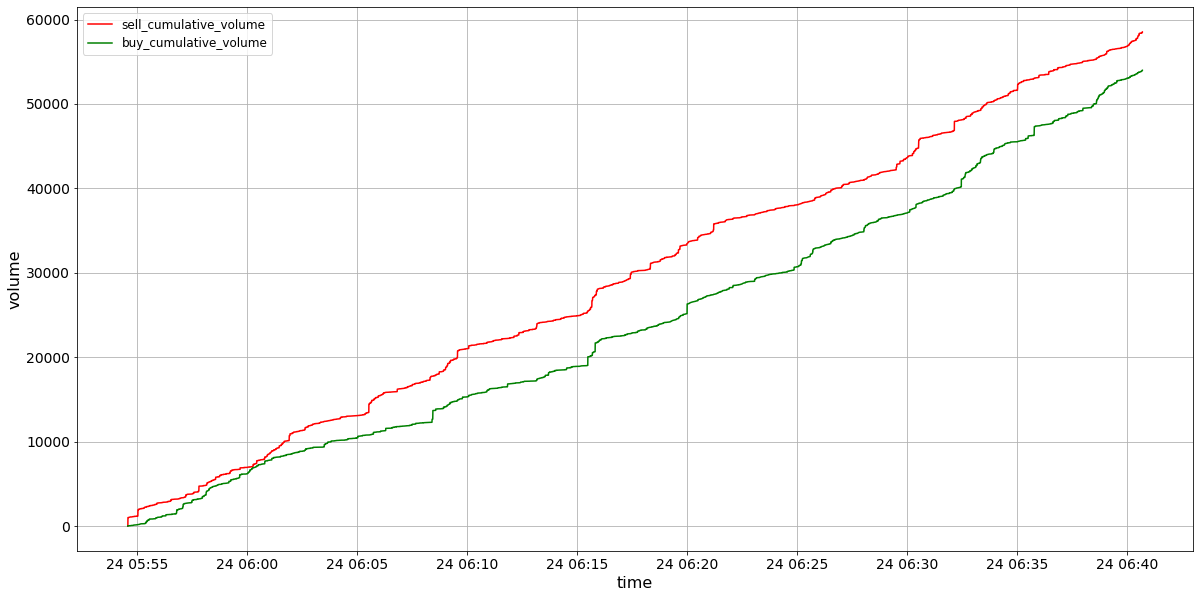

In [16]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(data['sell_cumulative_volume'], 'r', label='sell_cumulative_volume')
ax.plot(data['buy_cumulative_volume'], 'g', label='buy_cumulative_volume')
plt.grid()
plt.legend(fontsize=12)
plt.xlabel('time', size=16)
plt.ylabel('volume', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

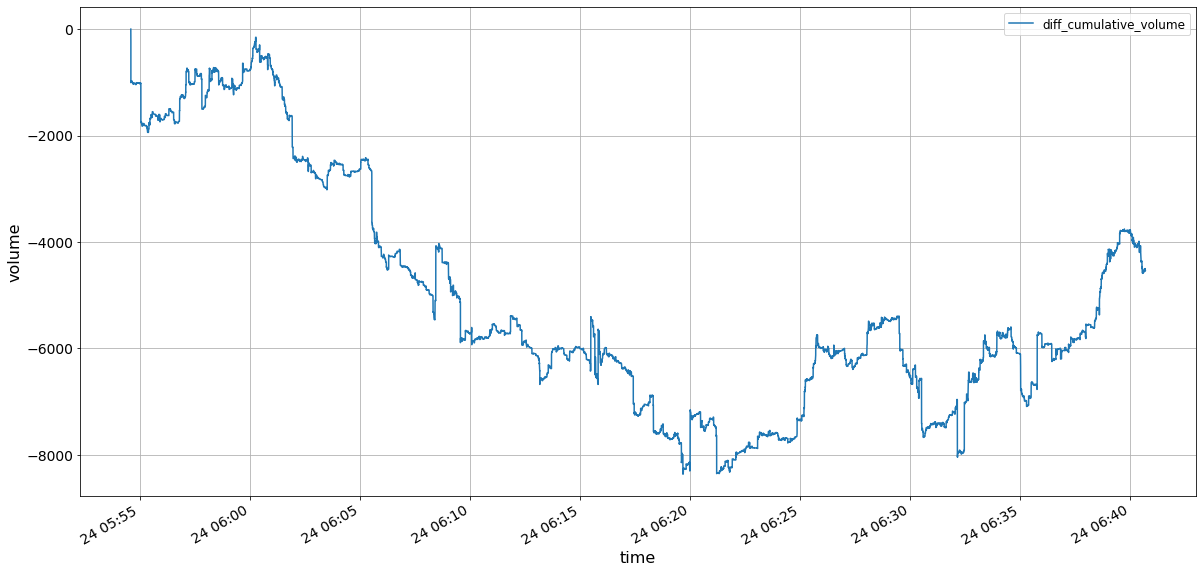

In [17]:
data.plot(y='diff_cumulative_volume', grid=True, figsize=(20, 10))
plt.legend(fontsize=12)
plt.xlabel('time', size=16)
plt.ylabel('volume', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

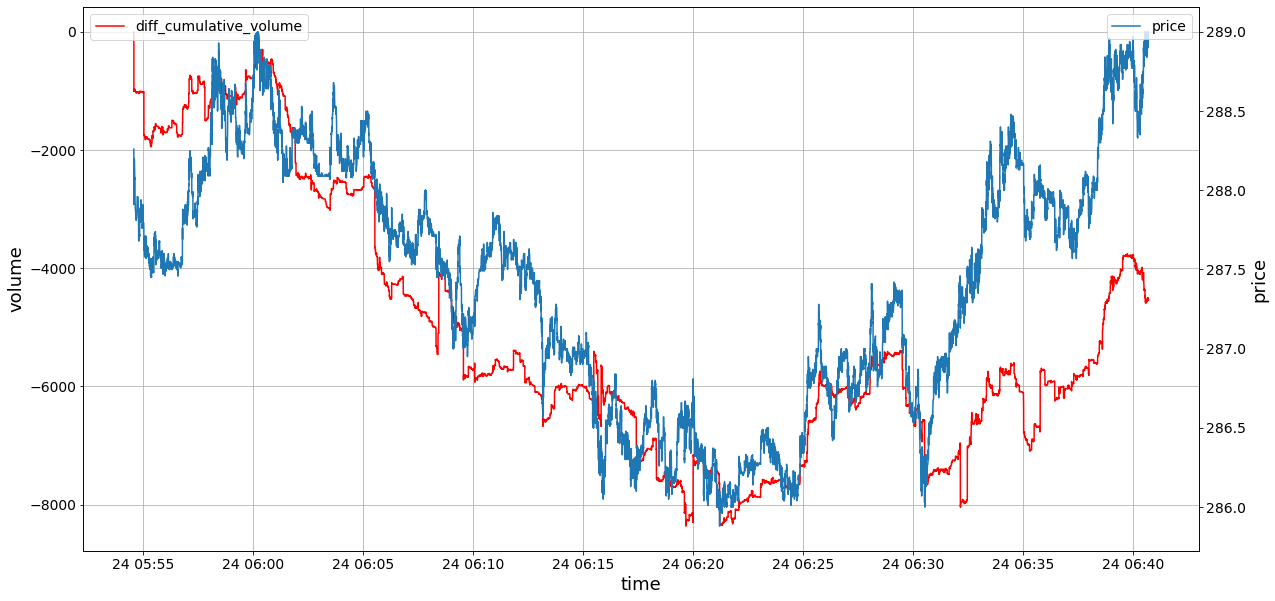

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(data['diff_cumulative_volume'], 'r', label='diff_cumulative_volume')
plt.grid()
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('time', size=18)
plt.ylabel('volume', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

ax1 = ax.twinx()
ax1.plot(df['price'], label='price')
plt.legend(loc='upper right', fontsize=14)
plt.ylabel('price', size=18)
plt.yticks(size=14)
plt.show()

In [19]:
def plot_on_time_interval(interval=1, unit='days'):
    
    start_time = df.index[0]
    
    if unit == 'days':
        end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60*24))
    elif unit == 'hours':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
    elif unit == 'minutes':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(minutes=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / 60)

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()
    plt.grid()

    for i in range(loop_times):
        unit_data = df.truncate(start_time, end_time)
        unit_data['cumulative_volume'] = unit_data['volume'].groupby(unit_data['isBuyerMaker']).cumsum()
        
        sell_data = unit_data.loc[unit_data['isBuyerMaker']==True][['cumulative_volume']]
        sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        buy_data = unit_data.loc[unit_data['isBuyerMaker']==False][['cumulative_volume']]
        buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        if unit == 'days':
            ax.plot(sell_data, 'r', label=str(i+1) + 'sell_cumulative_volume')
            ax.plot(buy_data, 'g', label=str(i+1) + 'buy_cumulative_volume')
            plt.legend(loc='upper left', fontsize=14)
        elif unit == 'hours':
            ax.plot(sell_data, 'r')
            ax.plot(buy_data, 'g')
        elif unit == 'minutes':
            ax.plot(sell_data, 'r')
            ax.plot(buy_data, 'g')
            
        plt.xlabel('time', size=18)
        plt.ylabel('volume', size=18)
        plt.xticks(size=14)
        plt.yticks(size=14)
        
        start_time = end_time
        if unit == 'days':
            end_time += datetime.timedelta(days=interval)
        elif unit == 'hours':
            end_time += datetime.timedelta(hours=interval)
        elif unit == 'minutes':
            end_time += datetime.timedelta(minutes=interval)

    ax1 = ax.twinx()
    ax1.plot(df['price'], label='price')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('time', size=18)
    plt.ylabel('price', size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

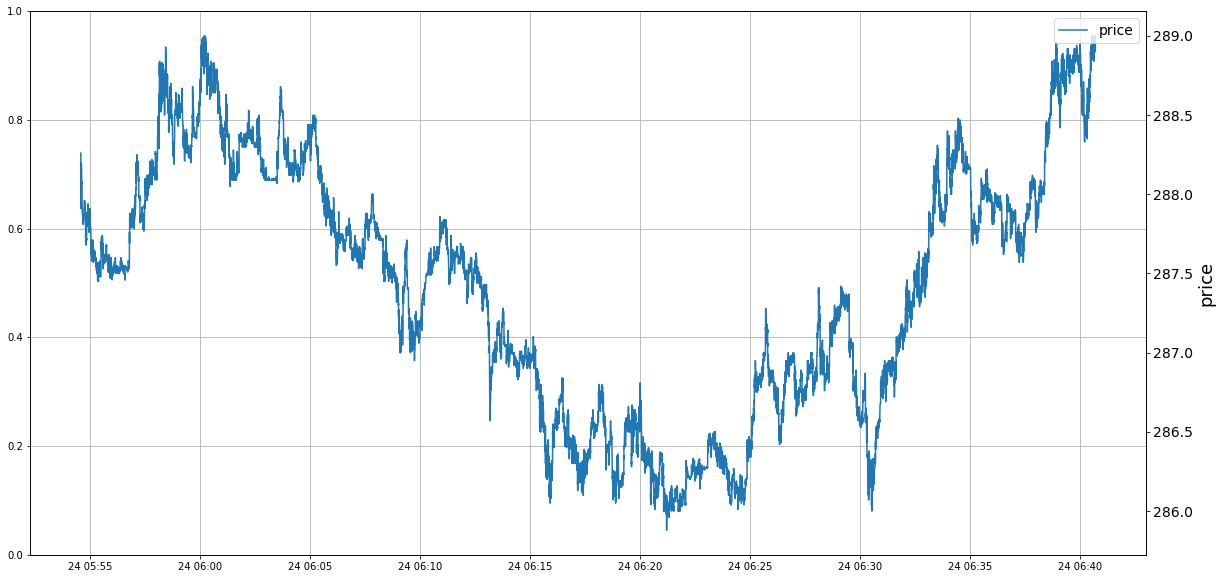

In [20]:
plot_on_time_interval()

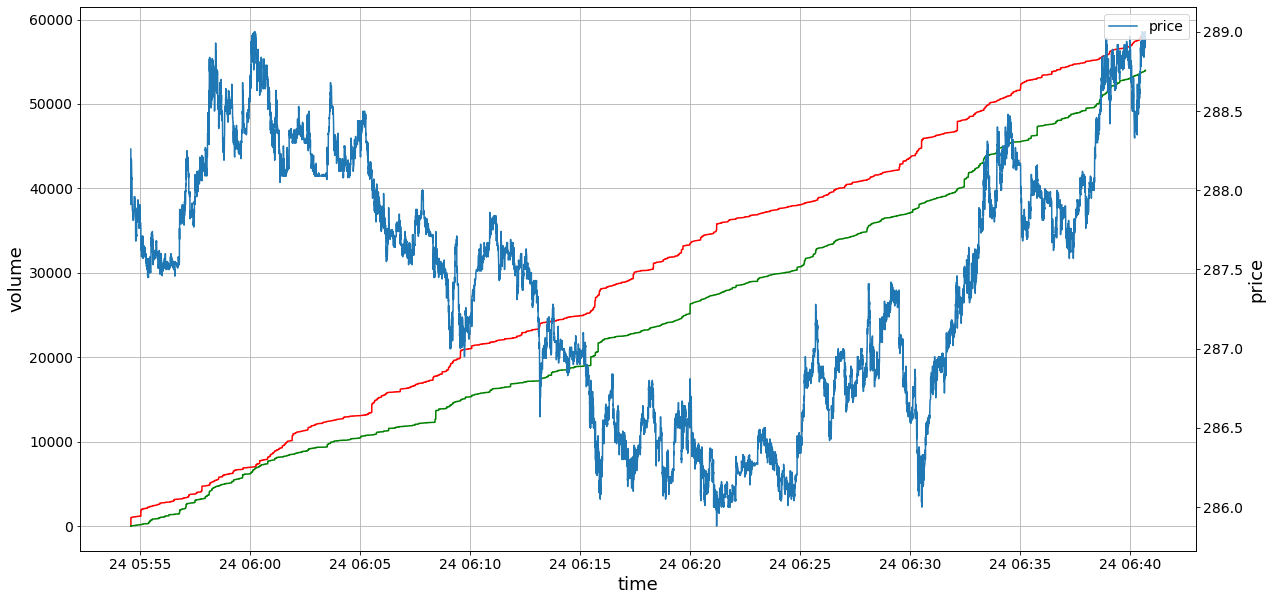

In [21]:
plot_on_time_interval(unit='hours')

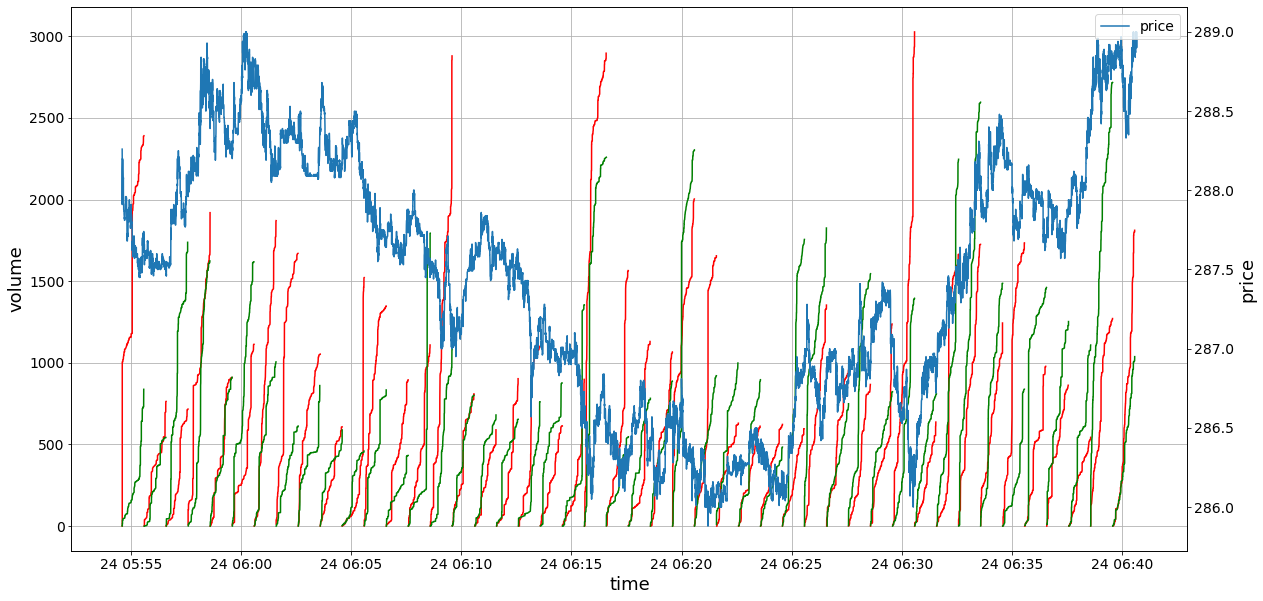

In [22]:
plot_on_time_interval(unit='minutes')

In [23]:
def plot_on_time_interval_and_diff_volume(interval=1, unit='days'):
    
    start_time = df.index[0]
    
    if unit == 'days':
        end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60*24))
    elif unit == 'hours':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
    elif unit == 'minutes':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(minutes=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / 60)

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()
    plt.grid()

    for i in range(loop_times):
        unit_data = df.truncate(start_time, end_time)
        unit_data['cumulative_volume'] = unit_data['volume'].groupby(unit_data['isBuyerMaker']).cumsum()
        
        sell_data = unit_data.loc[unit_data['isBuyerMaker']==True][['cumulative_volume']]
        sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        buy_data = unit_data.loc[unit_data['isBuyerMaker']==False][['cumulative_volume']]
        buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        data = pd.merge(sell_data, buy_data, how='outer', left_index=True, right_index=True)
        data.fillna(method='ffill', inplace=True)
        data.fillna(0, inplace=True)
        data.reset_index(inplace=True)
        data.drop_duplicates('time', keep='last', inplace=True)
        data.set_index('time', inplace=True)
        data['diff_cumulative_volume'] = data['buy_cumulative_volume'] - data['sell_cumulative_volume']
        
        if unit == 'days':
            ax.plot(data['diff_cumulative_volume'], label=str(i+1) + 'diff_cumulative_volume')
            plt.legend(loc='upper left', fontsize=14)
        elif unit == 'hours':
            ax.plot(data['diff_cumulative_volume'])
        elif unit == 'minutes':
            ax.plot(data['diff_cumulative_volume'])
            
        plt.xlabel('time', size=18)
        plt.ylabel('volume', size=18)
        plt.xticks(size=14)
        plt.yticks(size=14)
        
        start_time = end_time
        if unit == 'days':
            end_time += datetime.timedelta(days=interval)
        elif unit == 'hours':
            end_time += datetime.timedelta(hours=interval)
        elif unit == 'minutes':
            end_time += datetime.timedelta(minutes=interval)

    ax1 = ax.twinx()
    ax1.plot(df['price'], label='price')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('time', size=18)
    plt.ylabel('price', size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

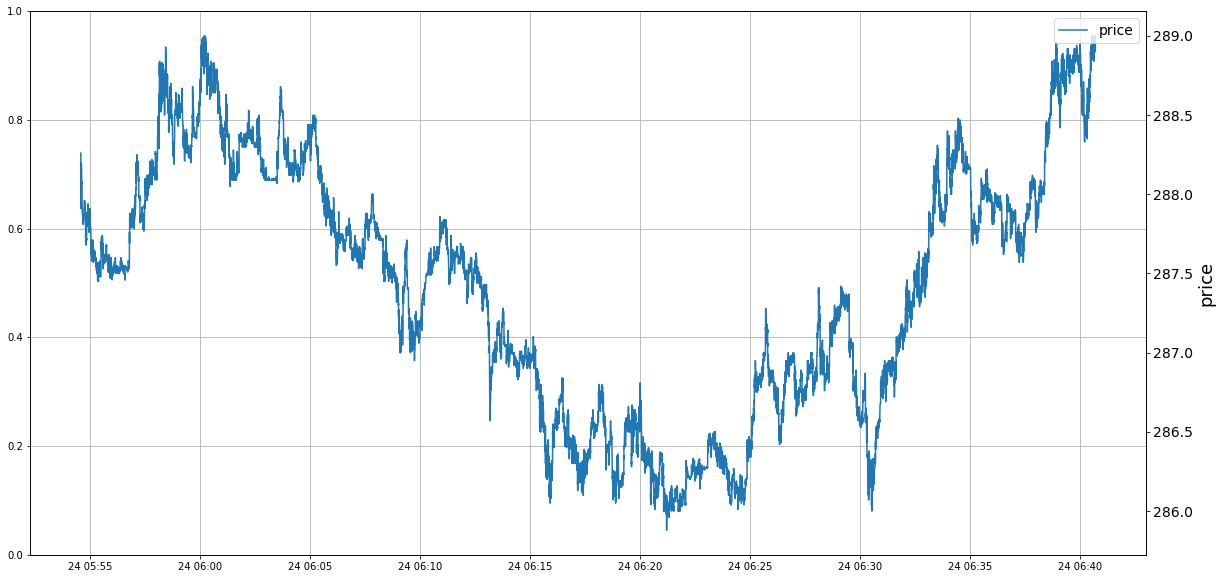

In [24]:
plot_on_time_interval_and_diff_volume()

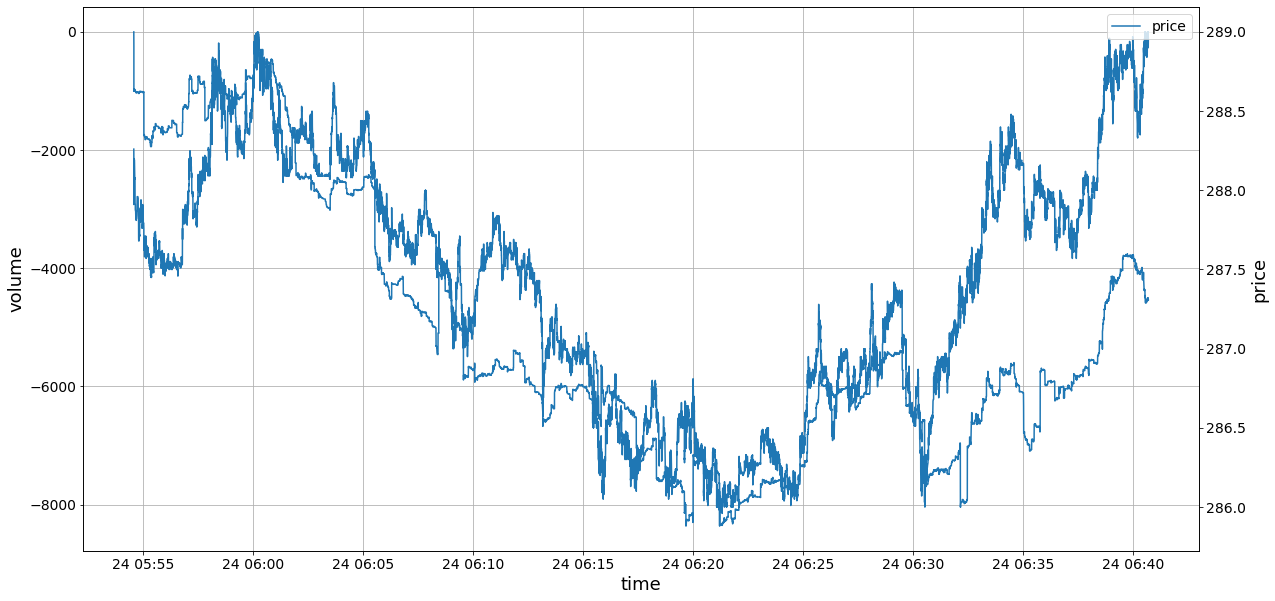

In [25]:
plot_on_time_interval_and_diff_volume(unit='hours')

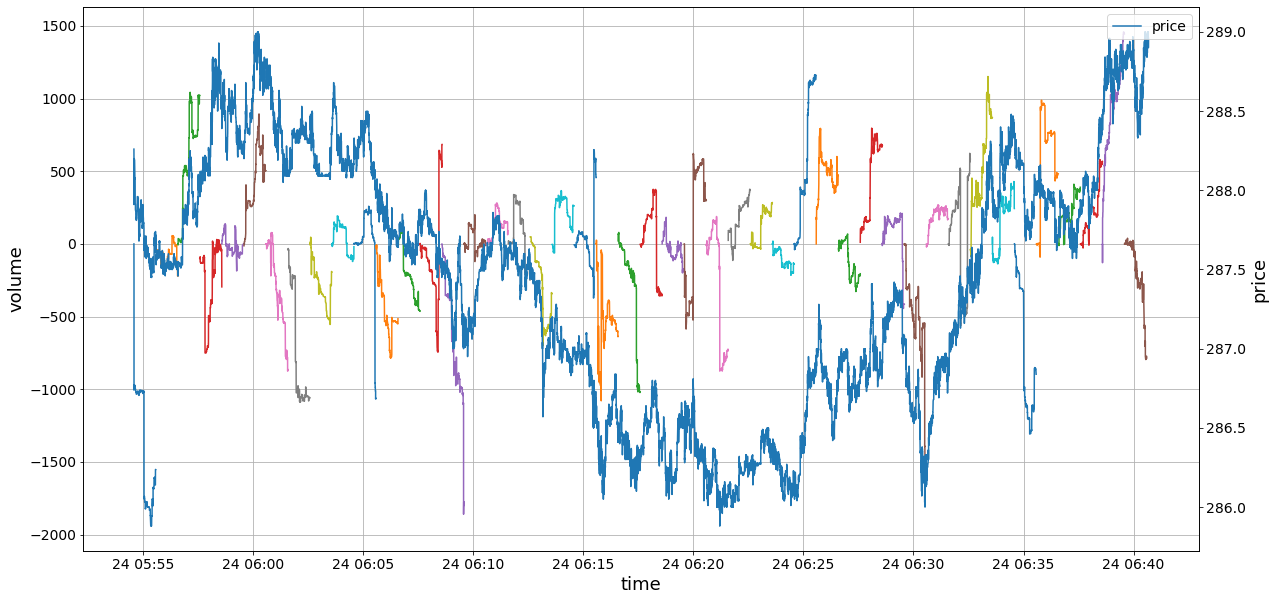

In [26]:
plot_on_time_interval_and_diff_volume(unit='minutes')

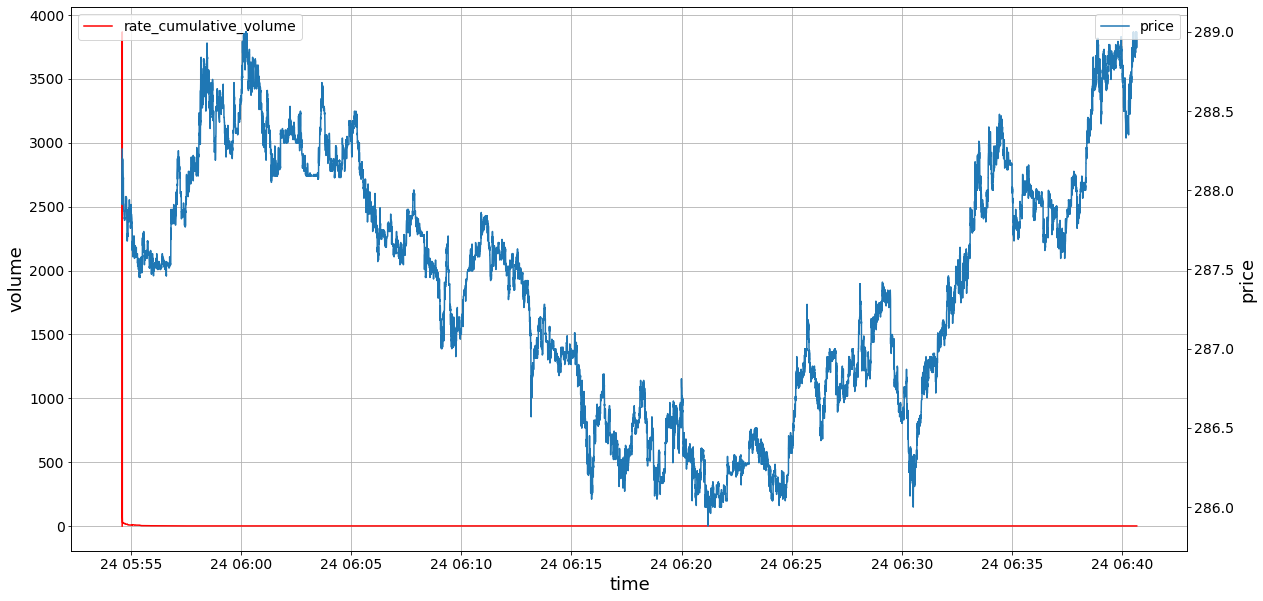

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(data['rate_cumulative_volume'], 'r', label='rate_cumulative_volume')
plt.grid()
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('time', size=18)
plt.ylabel('volume', size=18)
plt.xticks(size=14)
plt.yticks(size=14)

ax1 = ax.twinx()
ax1.plot(df['price'], label='price')
plt.legend(loc='upper right', fontsize=14)
plt.ylabel('price', size=18)
plt.yticks(size=14)
plt.show()

In [28]:
def plot_on_time_interval_and_rate_volume(interval=1, unit='days'):
    
    start_time = df.index[0]
    
    if unit == 'days':
        end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60*24))
    elif unit == 'hours':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
    elif unit == 'minutes':
        end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(minutes=interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / 60)

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()
    plt.grid()

    for i in range(loop_times):
        unit_data = df.truncate(start_time, end_time)
        unit_data['cumulative_volume'] = unit_data['volume'].groupby(unit_data['isBuyerMaker']).cumsum()
        
        sell_data = unit_data.loc[unit_data['isBuyerMaker']==True][['cumulative_volume']]
        sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        buy_data = unit_data.loc[unit_data['isBuyerMaker']==False][['cumulative_volume']]
        buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        data = pd.merge(sell_data, buy_data, how='outer', left_index=True, right_index=True)
        data.fillna(method='ffill', inplace=True)
        data.fillna(0, inplace=True)
        data.reset_index(inplace=True)
        data.drop_duplicates('time', keep='last', inplace=True)
        data.set_index('time', inplace=True)
        data['rate_cumulative_volume'] = data['sell_cumulative_volume'] / data['buy_cumulative_volume']
        
        if unit == 'days':
            ax.plot(data['rate_cumulative_volume'], label=str(i+1) + 'rate_cumulative_volume')
            plt.legend(loc='upper left', fontsize=14)
        elif unit == 'hours':
            ax.plot(data['rate_cumulative_volume'])
        elif unit == 'minutes':
            ax.plot(data['rate_cumulative_volume'])
            
        plt.xlabel('time', size=18)
        plt.ylabel('volume', size=18)
        plt.xticks(size=14)
        plt.yticks(size=14)
        
        start_time = end_time
        if unit == 'days':
            end_time += datetime.timedelta(days=interval)
        elif unit == 'hours':
            end_time += datetime.timedelta(hours=interval)
        elif unit == 'minutes':
            end_time += datetime.timedelta(minutes=interval)

    ax1 = ax.twinx()
    ax1.plot(df['price'], label='price')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('time', size=18)
    plt.ylabel('price', size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

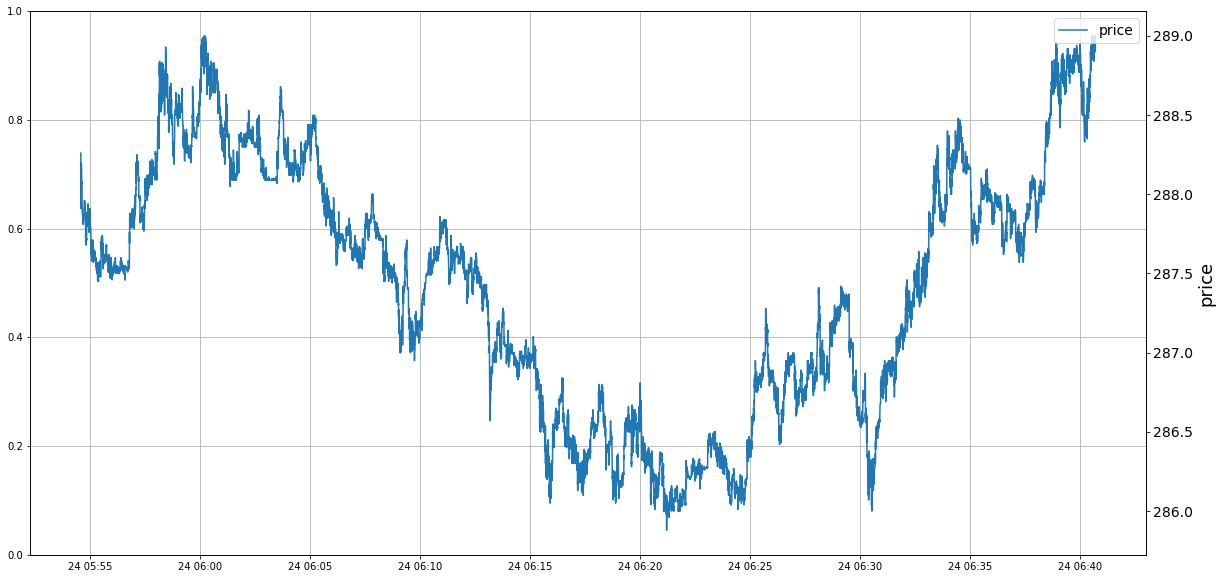

In [29]:
plot_on_time_interval_and_rate_volume()

In [30]:
def plot_on_queue_interval_and_diff_volume(interval=None, unit='days', queue=1):
    
    start_time = df.index[0]
    
    if interval == None:
        end_time = df.index[-1]
    else:
        if unit == 'days':
            end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=interval)
            loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60*24))
            if queue * interval > loop_times:
                print('没有此时间段的数据。')
                return
        elif unit == 'hours':
            end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=interval)
            loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
            if queue * interval > loop_times:
                print('没有此时间段的数据。')
                return
        elif unit == 'minutes':
            end_time = datetime.datetime.strptime(str(start_time)[0:19], '%Y-%m-%d %H:%M:%S') + datetime.timedelta(minutes=interval)
            loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / 60)
            if queue * interval > loop_times:
                print('没有此时间段的数据。')     
                return       

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()
    plt.grid()

    for i in range(queue):         
        unit_data = df.truncate(start_time, end_time)
        unit_data['cumulative_volume'] = unit_data['volume'].groupby(unit_data['isBuyerMaker']).cumsum()
        
        sell_data = unit_data.loc[unit_data['isBuyerMaker']==True][['cumulative_volume']]
        sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        buy_data = unit_data.loc[unit_data['isBuyerMaker']==False][['cumulative_volume']]
        buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        data = pd.merge(sell_data, buy_data, how='outer', left_index=True, right_index=True)
        data.fillna(method='ffill', inplace=True)
        data.fillna(0, inplace=True)
        data.reset_index(inplace=True)
        data.drop_duplicates('time', keep='last', inplace=True)
        data.set_index('time', inplace=True)
        data['diff_cumulative_volume'] = data['buy_cumulative_volume'] - data['sell_cumulative_volume']
        
        if interval == None:
            ax.plot(data['diff_cumulative_volume'], 'r', label='total ' + 'diff cumulative volume')
            plt.legend(loc='upper left', fontsize=14)
            plt.xlabel('time', size=18)
            plt.ylabel('diff cumulative volume', size=18)
            plt.xticks(size=14)
            plt.yticks(size=14)
            ax1 = ax.twinx()
            ax1.plot(df['price'].loc[start_time:end_time], label='price')
            plt.legend(loc='upper right', fontsize=14)
            plt.xlabel('time', size=18)
            plt.ylabel('price', size=18)
            plt.xticks(size=14)
            plt.yticks(size=14)
            plt.show()
            break
        
        else:
            if i == queue - 1:
                if unit == 'days':
                    ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'days ' + 'diff cumulative volume')
                    plt.legend(loc='upper left', fontsize=14)
                elif unit == 'hours':
                    ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'hours ' + 'diff cumulative volume')
                    plt.legend(loc='upper left', fontsize=14) 
                elif unit == 'minutes':
                    ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'minutes ' + 'diff cumulative volume')
                    plt.legend(loc='upper left', fontsize=14)

                plt.xlabel('time', size=18)
                plt.ylabel('diff cumulative volume', size=18)
                plt.xticks(size=14)
                plt.yticks(size=14)
                ax1 = ax.twinx()
                ax1.plot(df['price'].loc[start_time:end_time], label='price')
                plt.legend(loc='upper right', fontsize=14)
                plt.xlabel('time', size=18)
                plt.ylabel('price', size=18)
                plt.xticks(size=14)
                plt.yticks(size=14)
                plt.show()

            start_time = end_time
            if unit == 'days':
                end_time += datetime.timedelta(days=interval)
            elif unit == 'hours':
                end_time += datetime.timedelta(hours=interval)
            elif unit == 'minutes':
                end_time += datetime.timedelta(minutes=interval)

In [31]:
plot_on_queue_interval_and_diff_volume(interval=1, unit='days', queue=1)

没有此时间段的数据。


In [32]:
plot_on_queue_interval_and_diff_volume(interval=2, unit='hours', queue=1)

没有此时间段的数据。


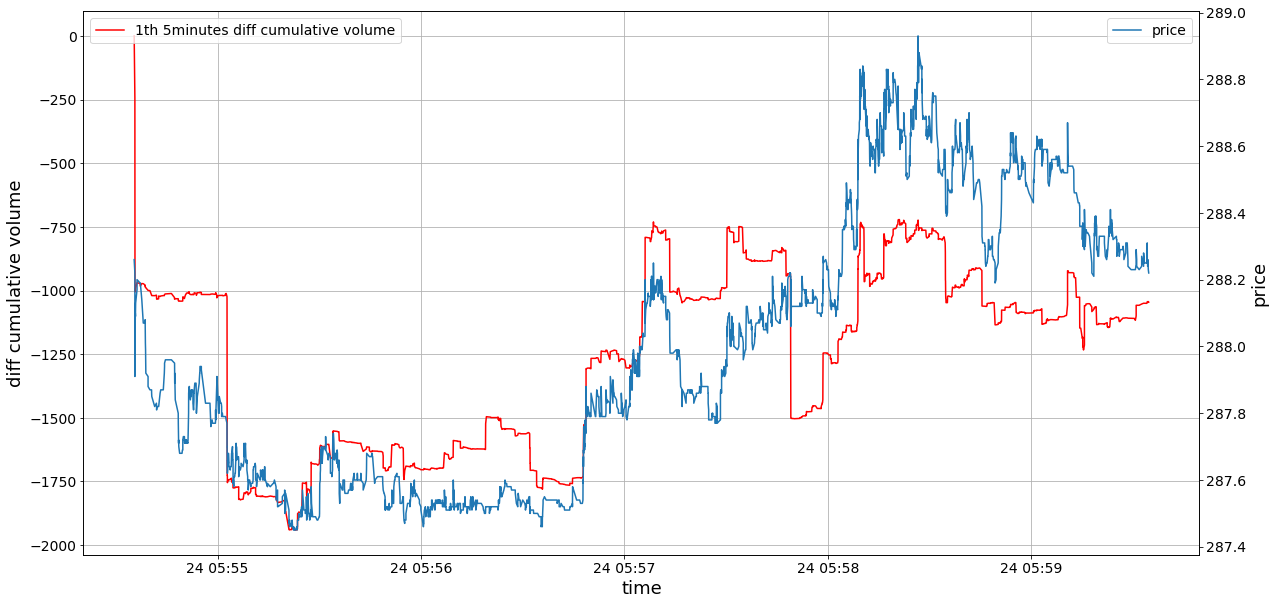

In [33]:
plot_on_queue_interval_and_diff_volume(interval=5, unit='minutes', queue=1)

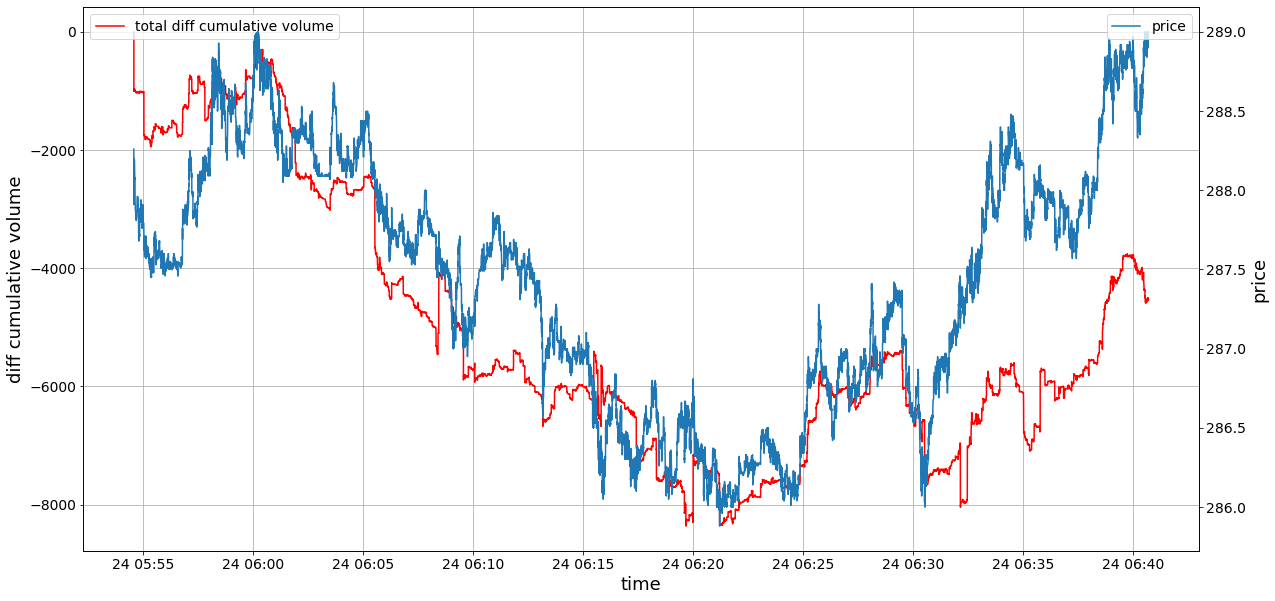

In [34]:
plot_on_queue_interval_and_diff_volume()

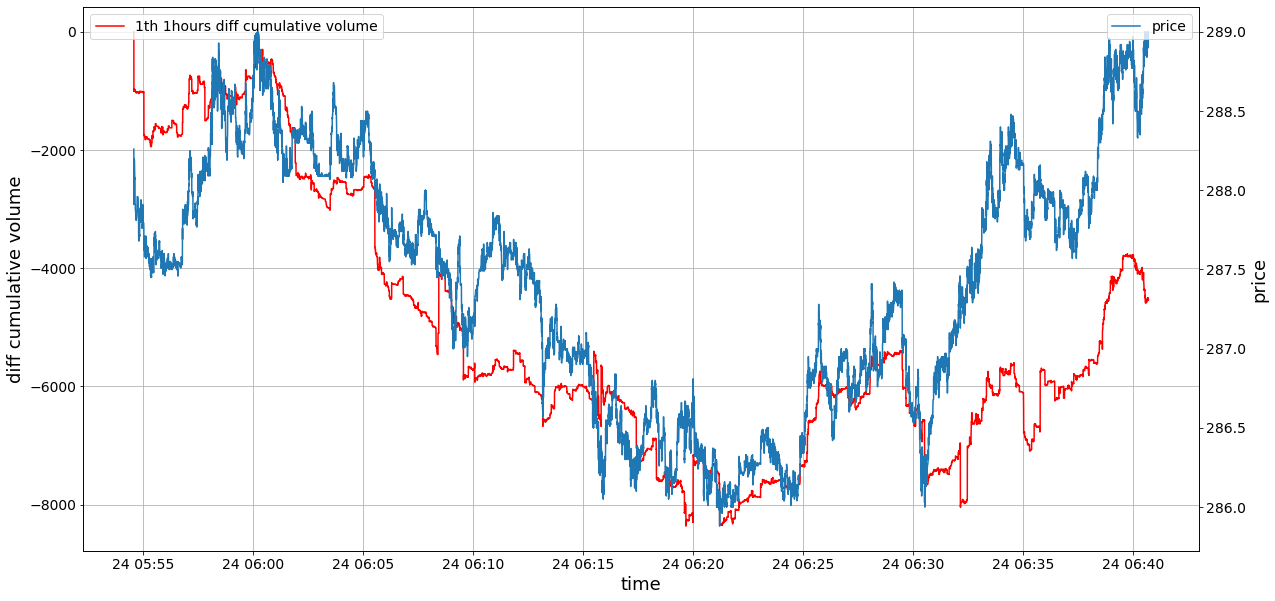

In [35]:
loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
for i in range(loop_times):
    plot_on_queue_interval_and_diff_volume(interval=1, unit='hours', queue=i+1)

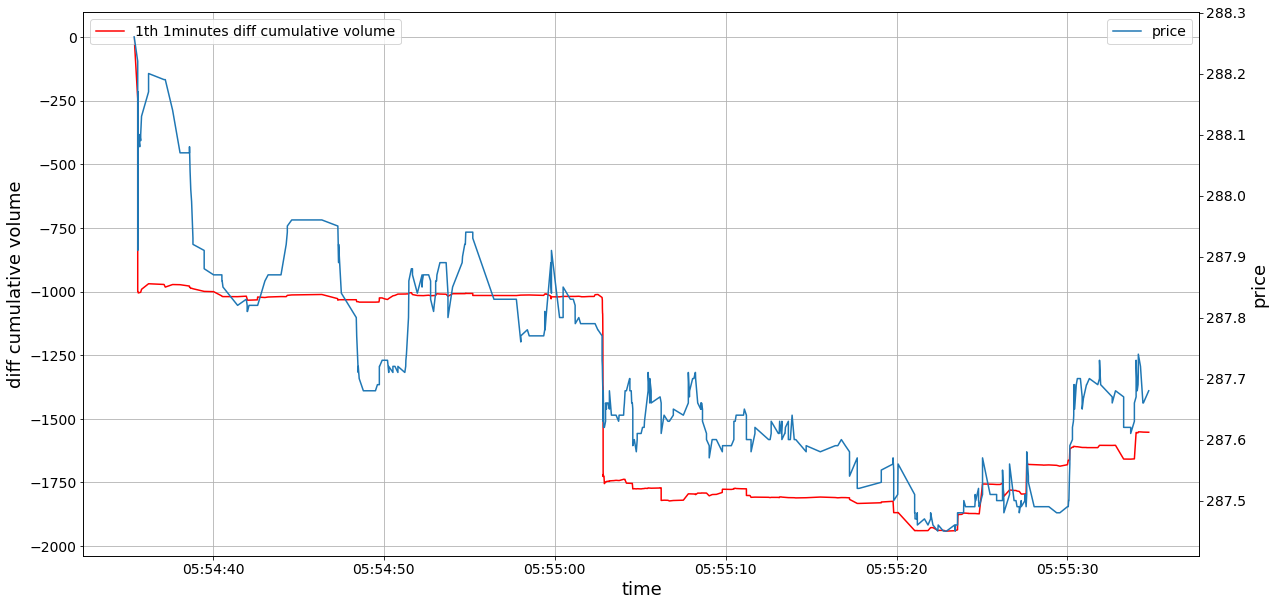

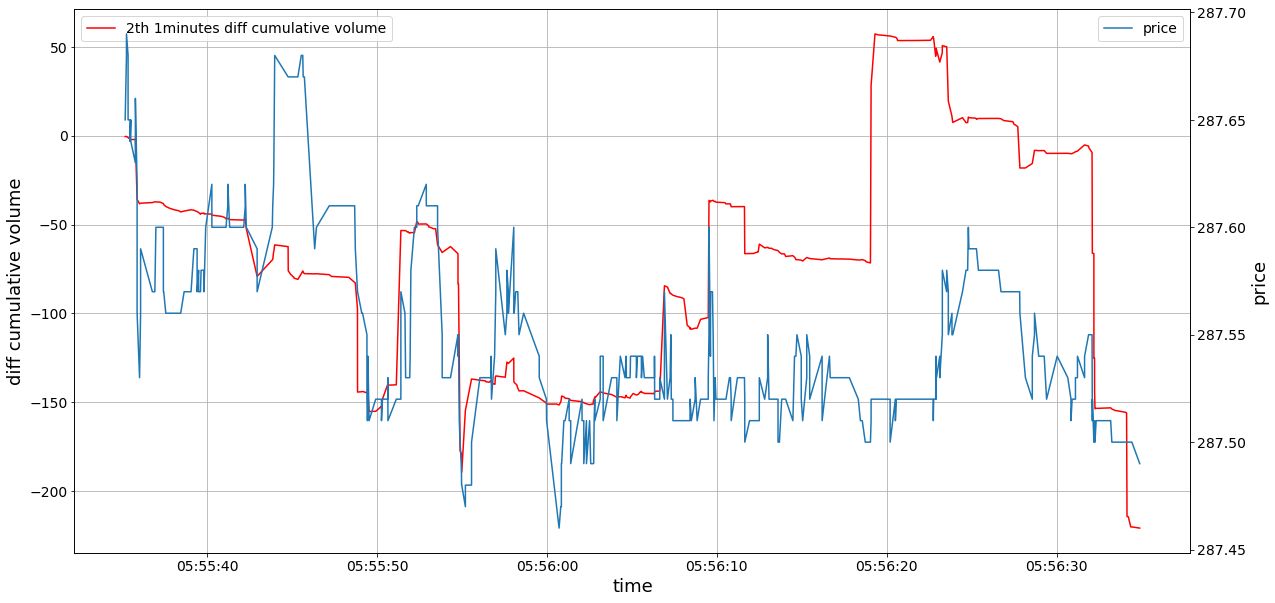

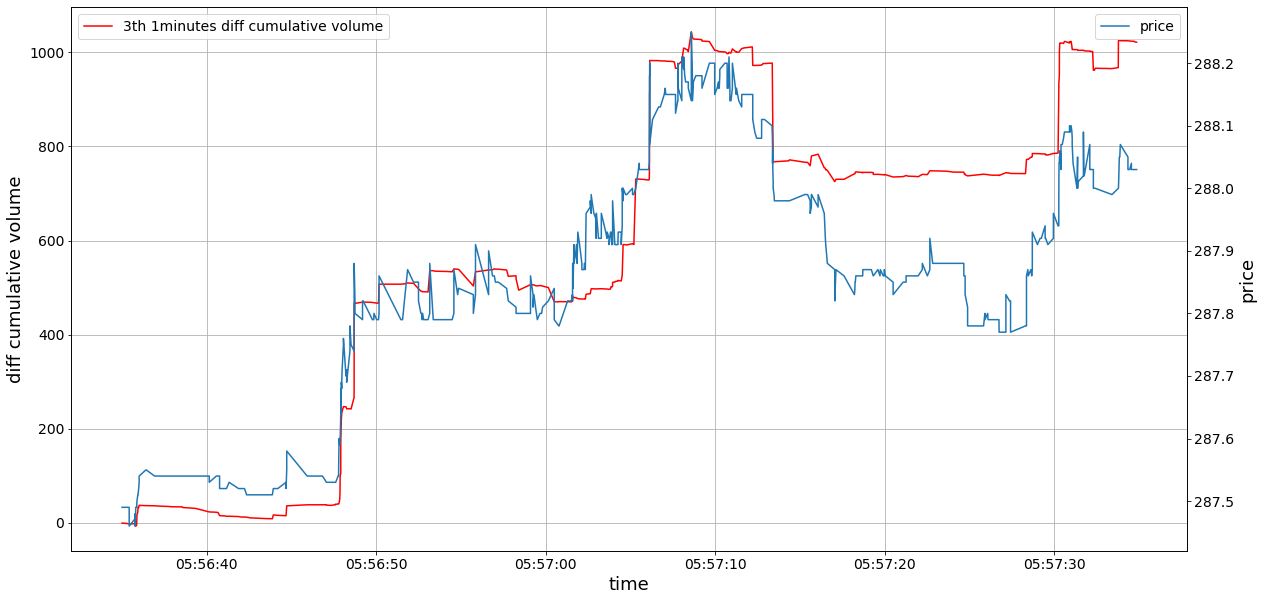

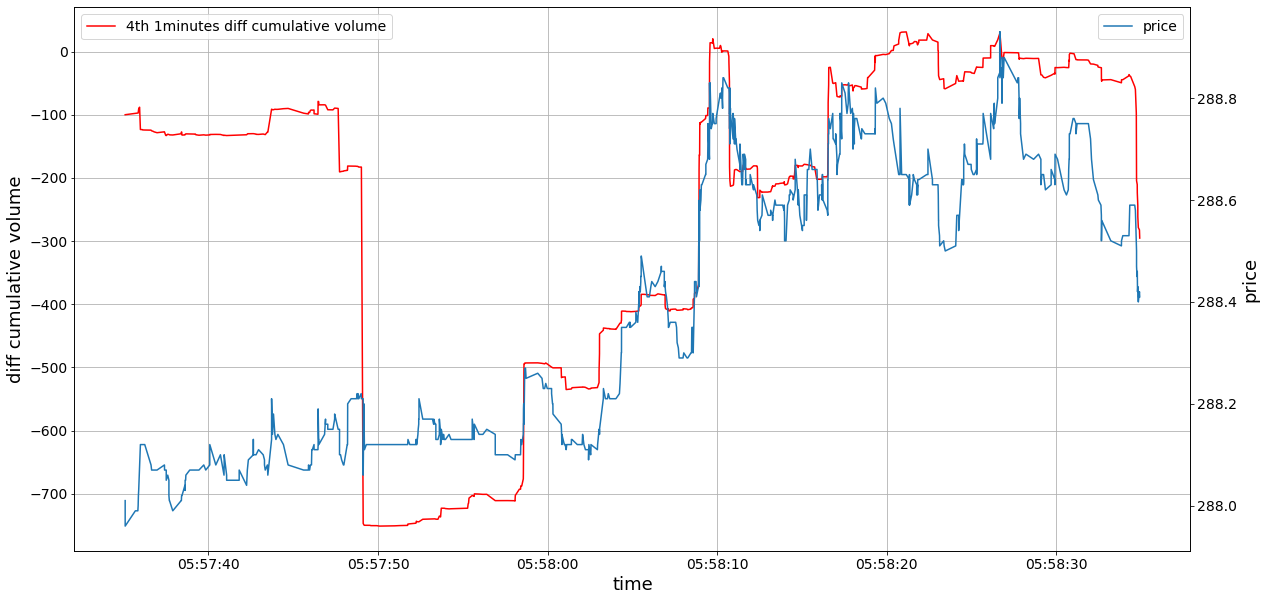

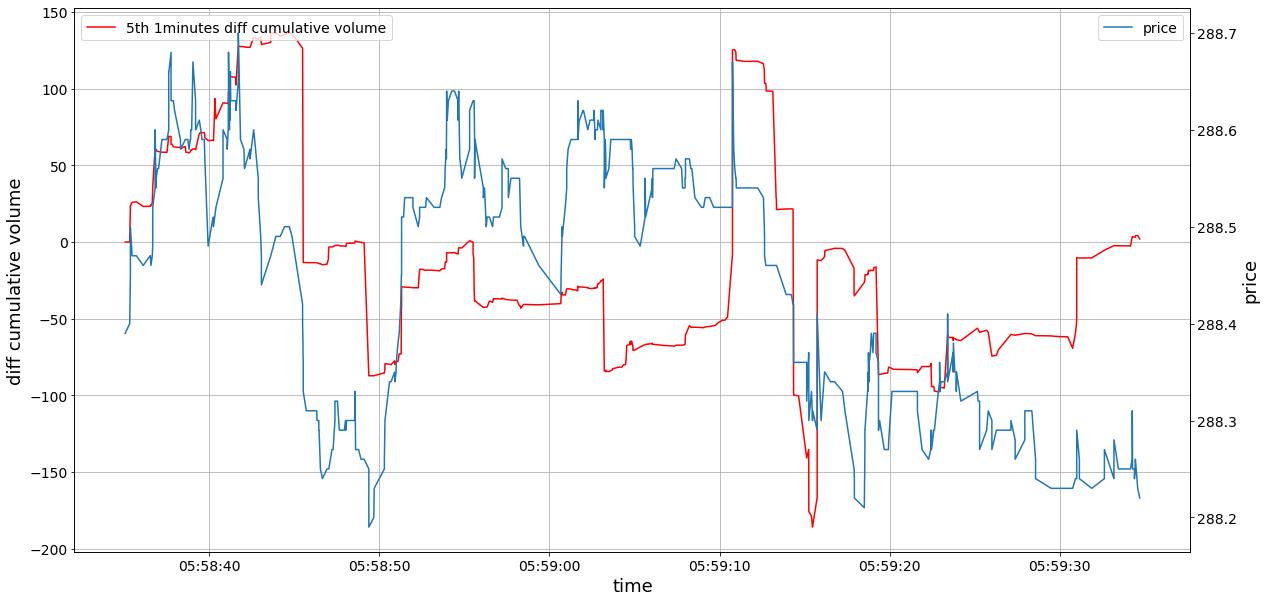

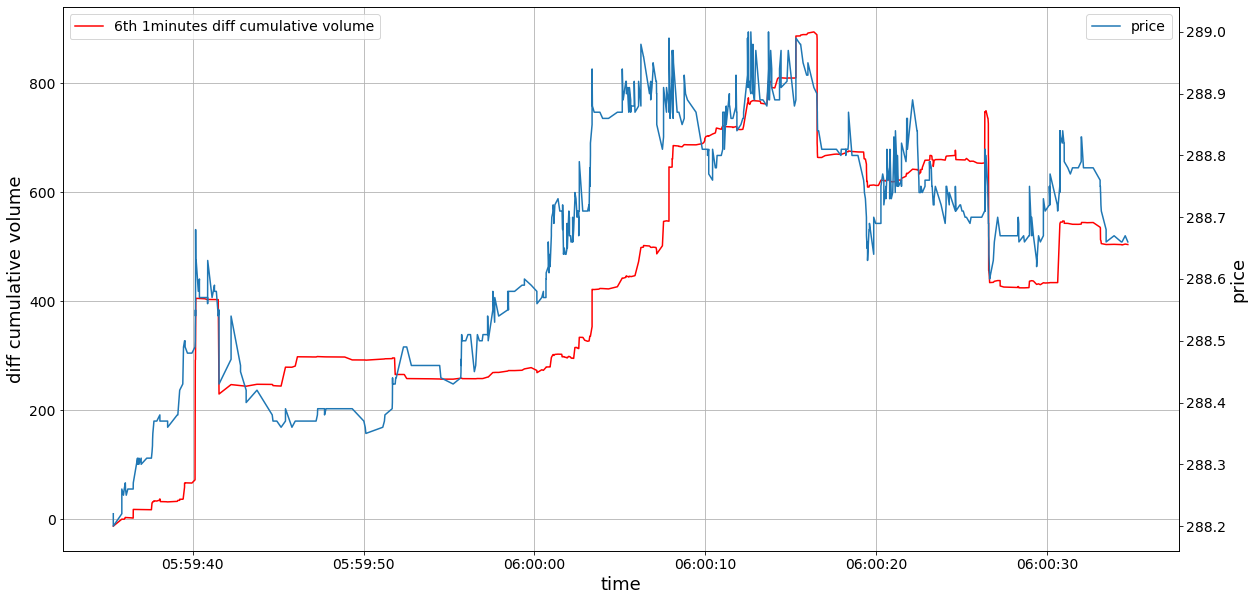

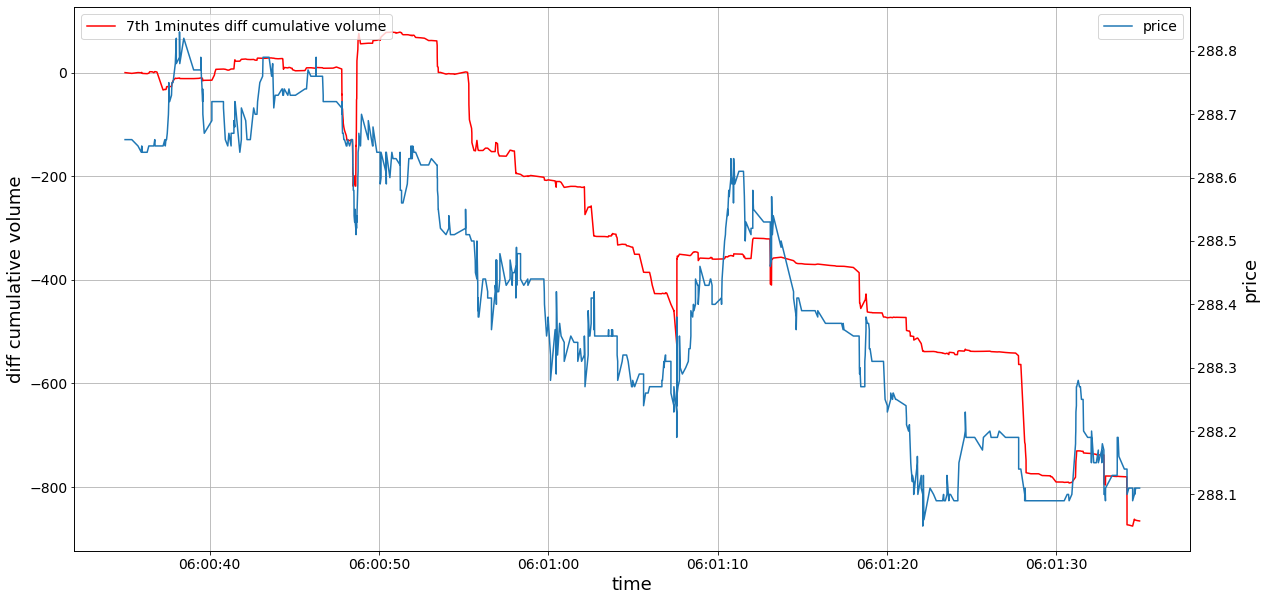

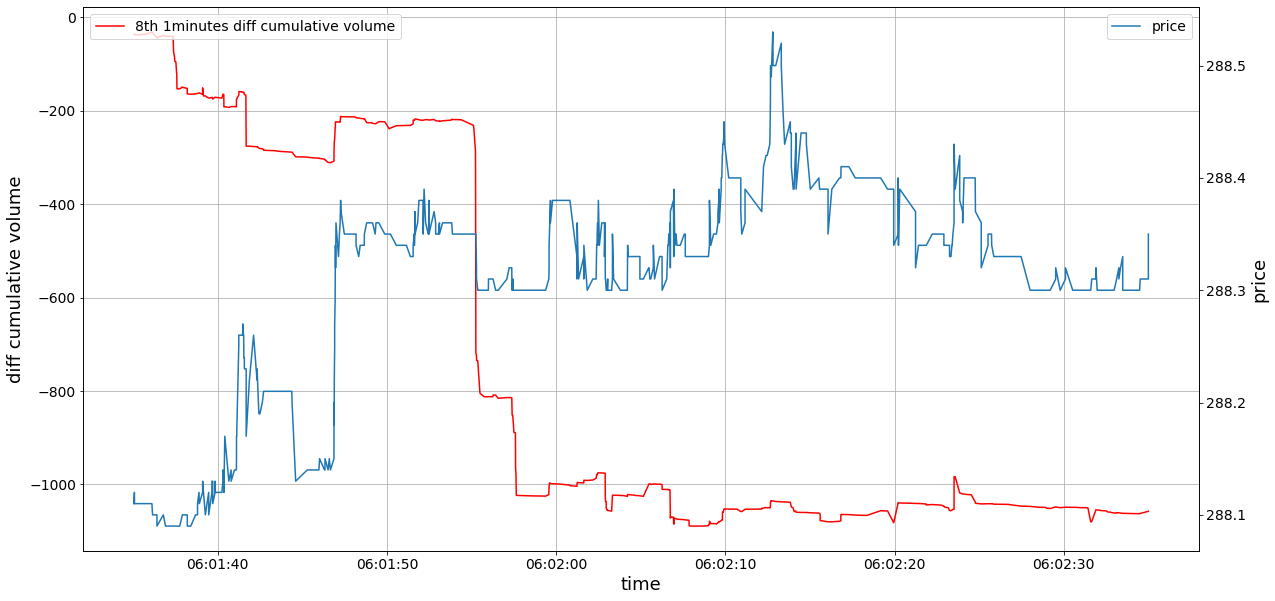

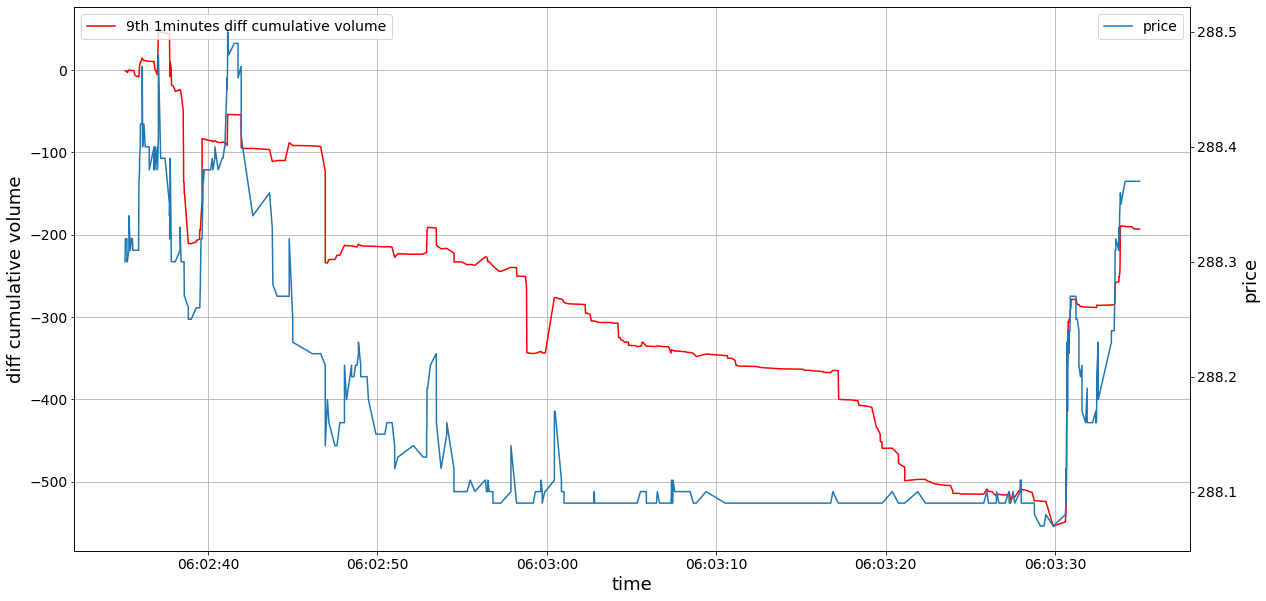

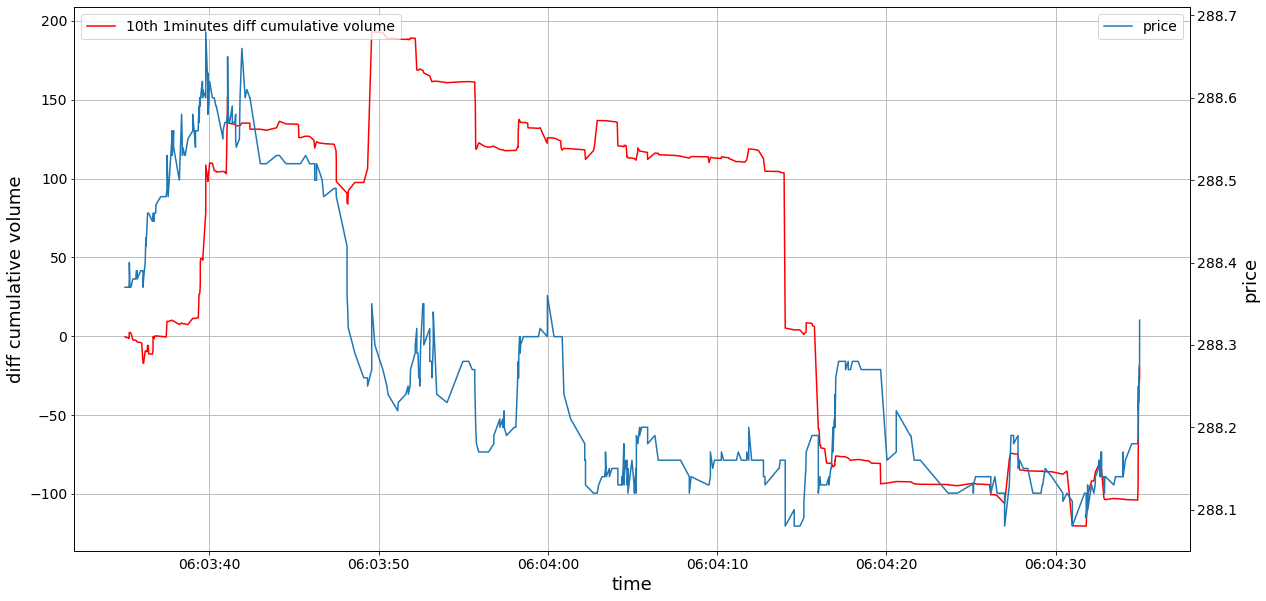

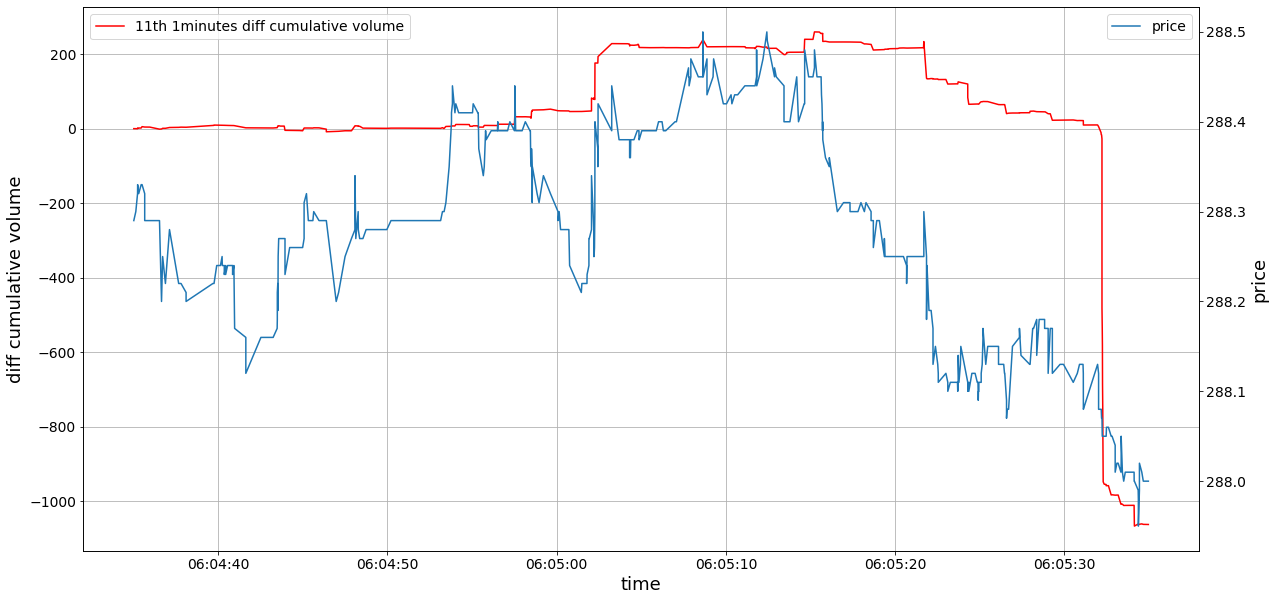

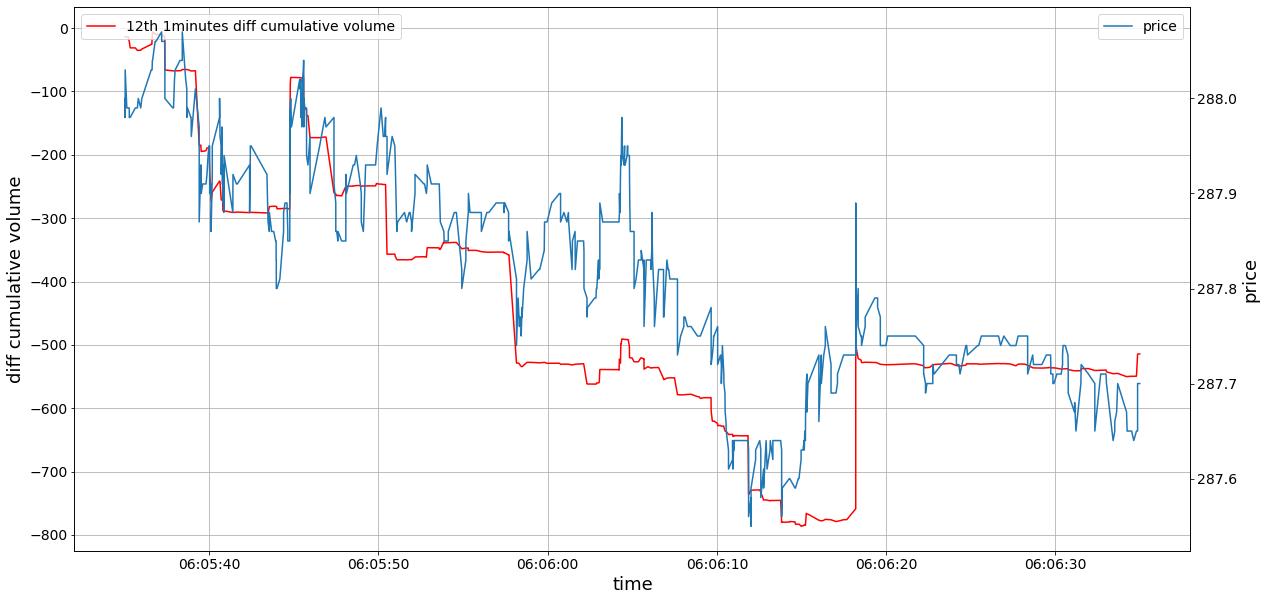

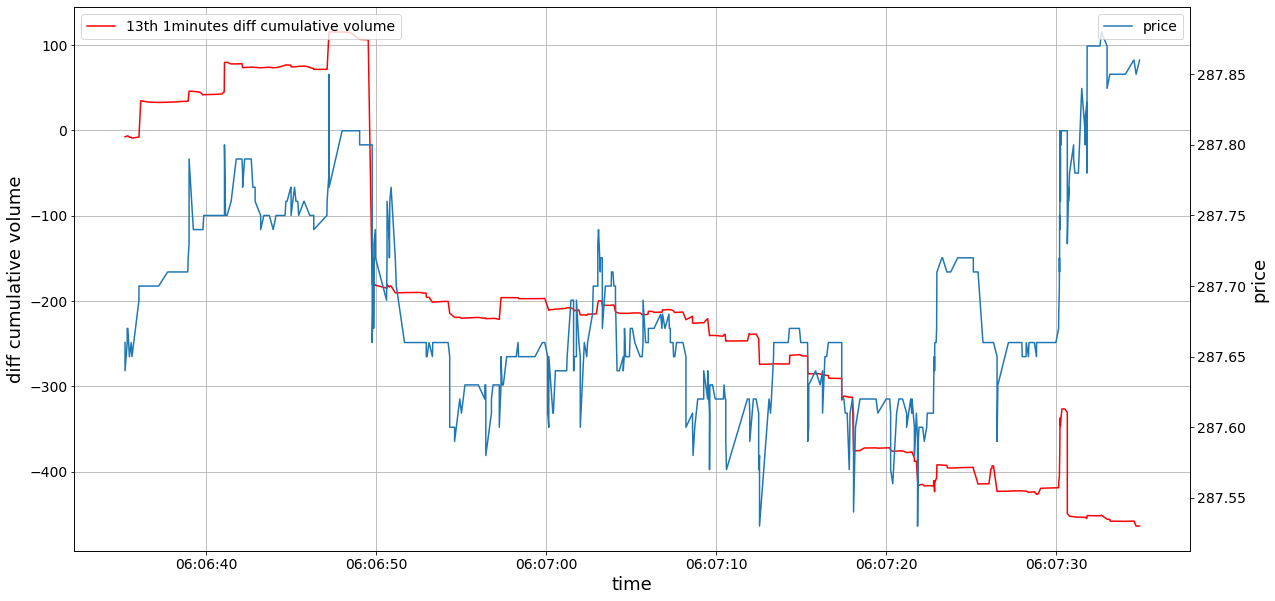

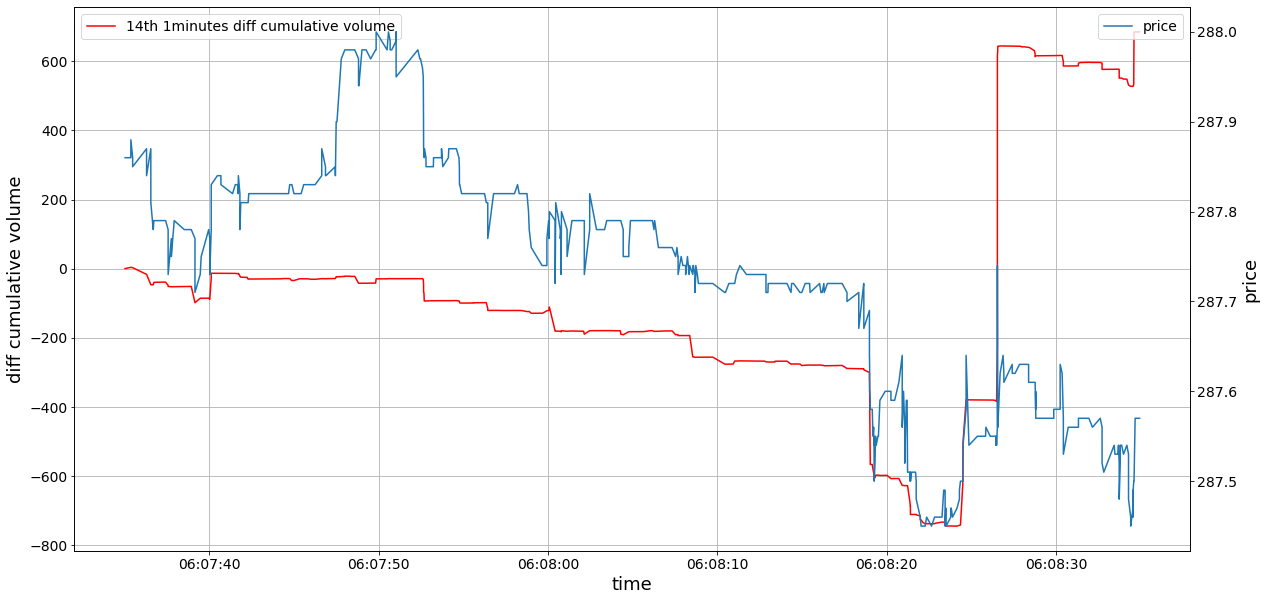

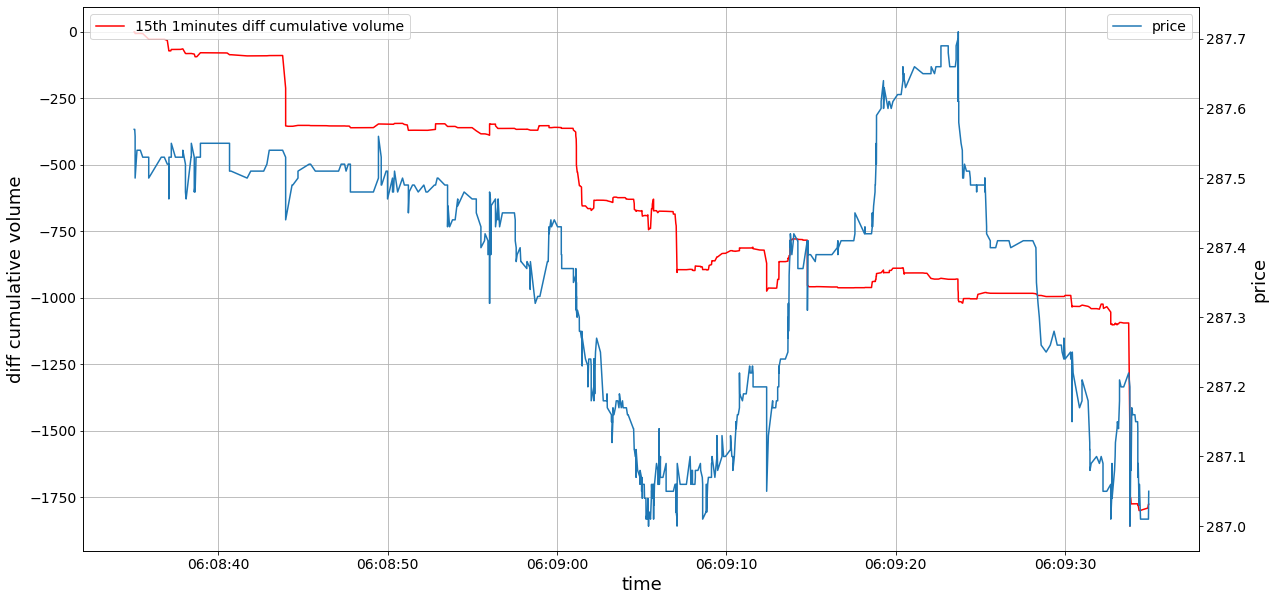

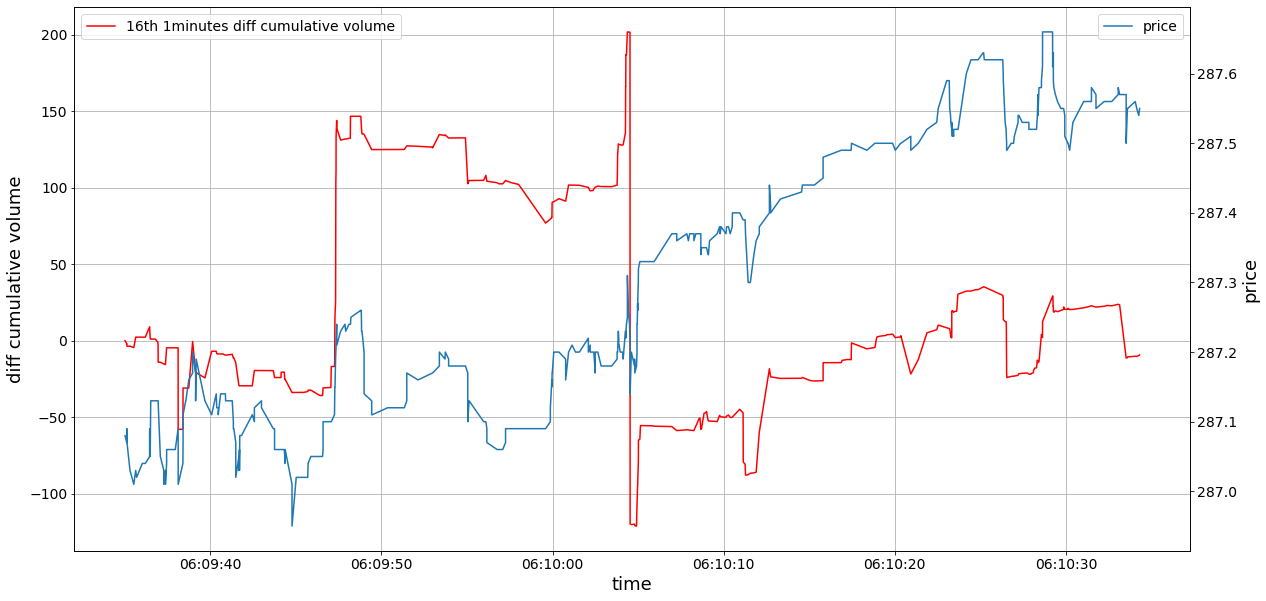

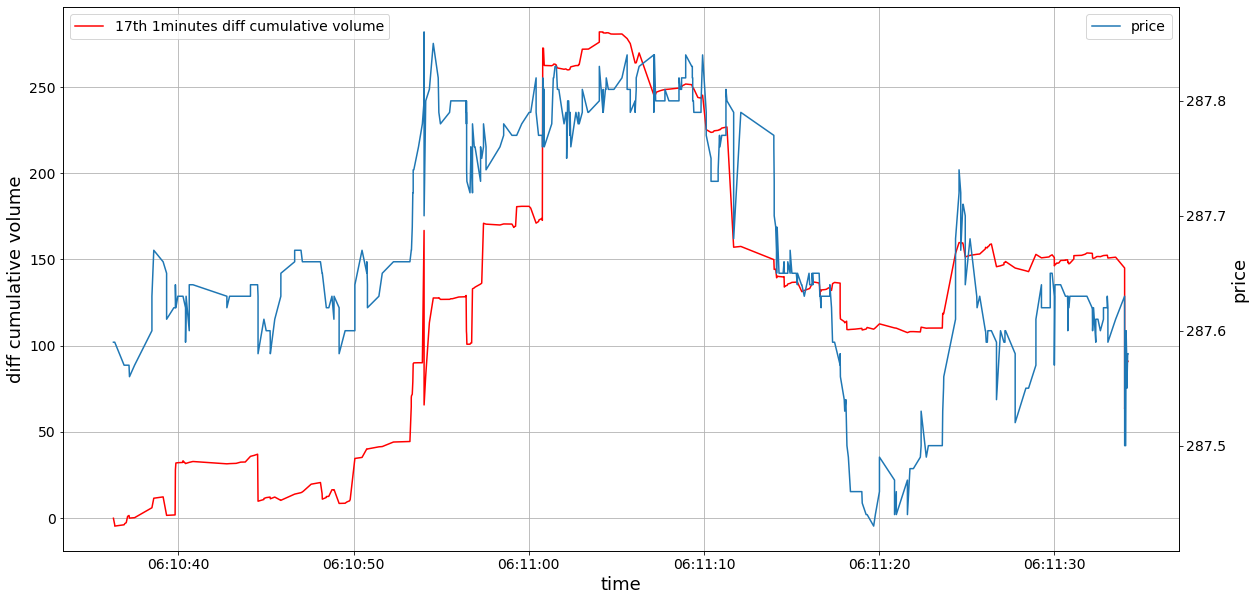

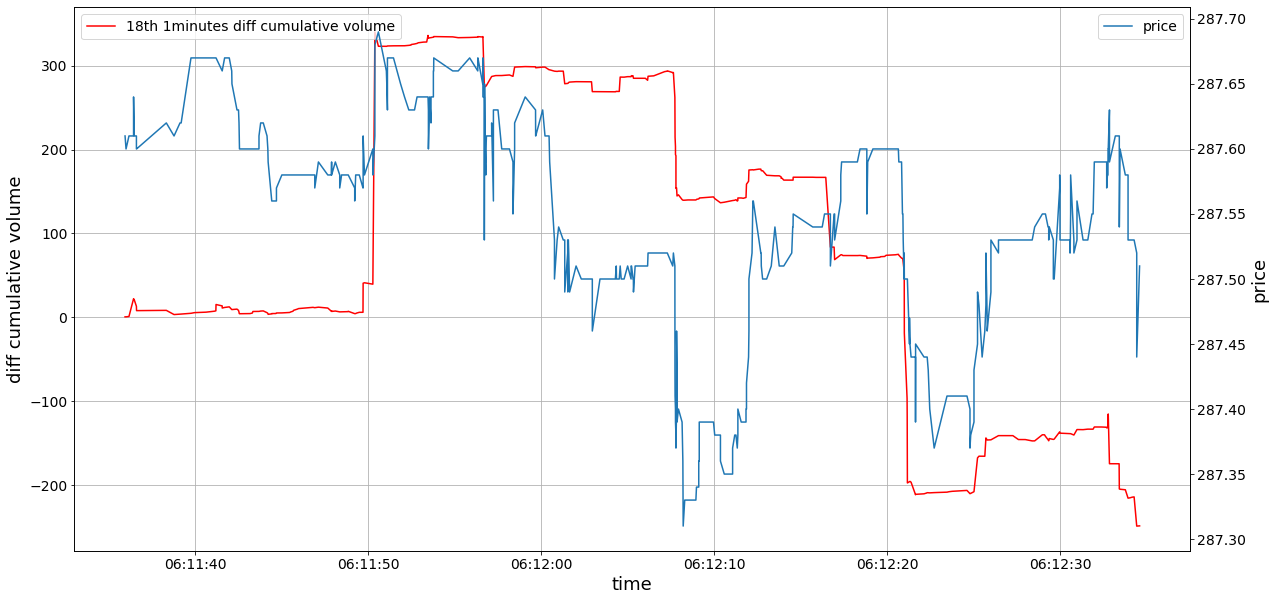

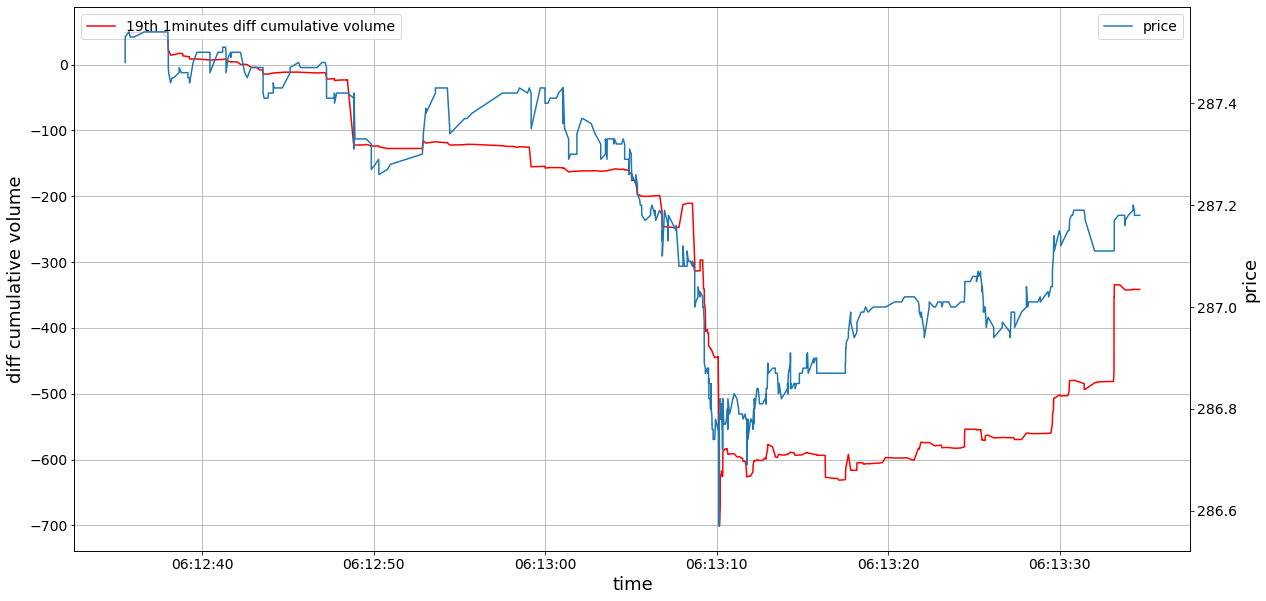

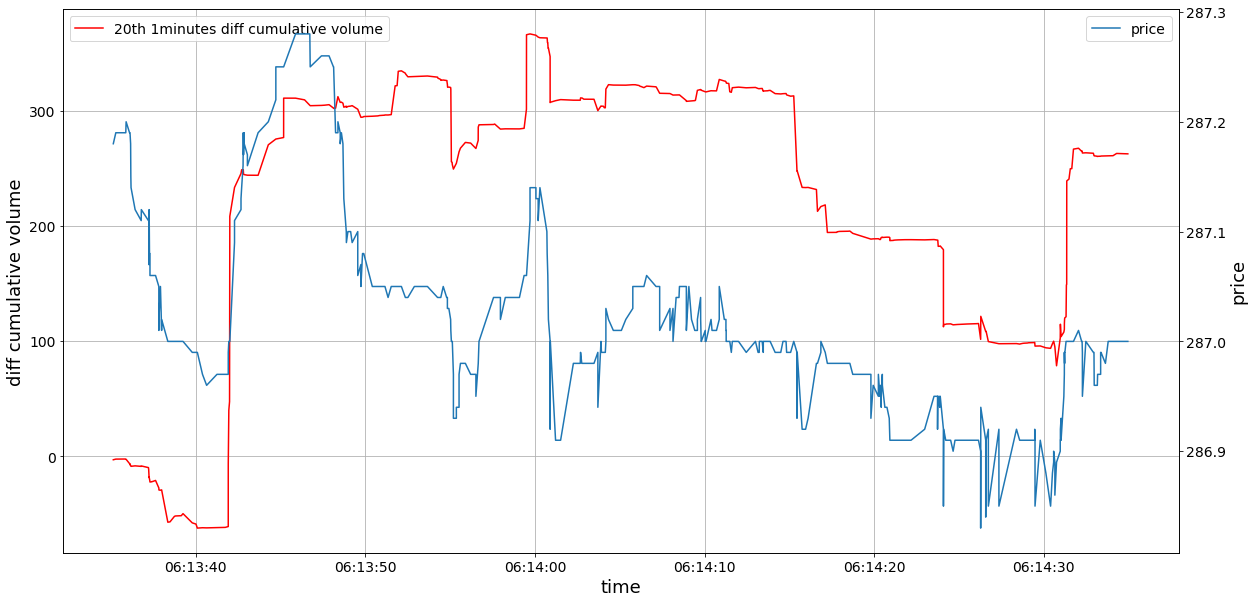

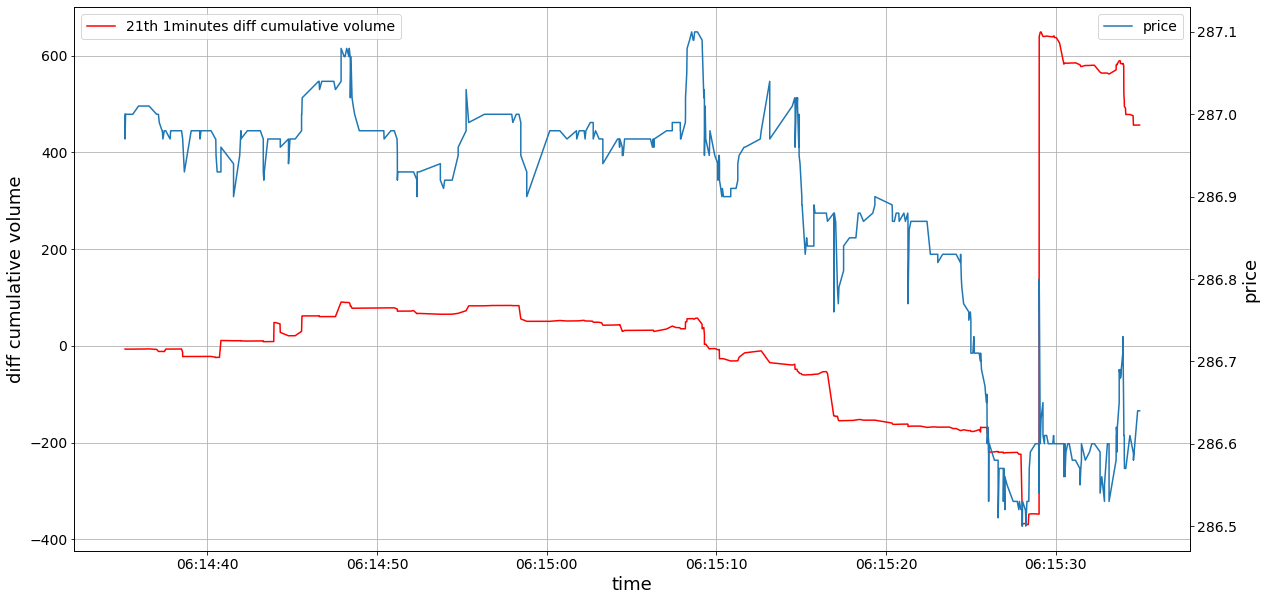

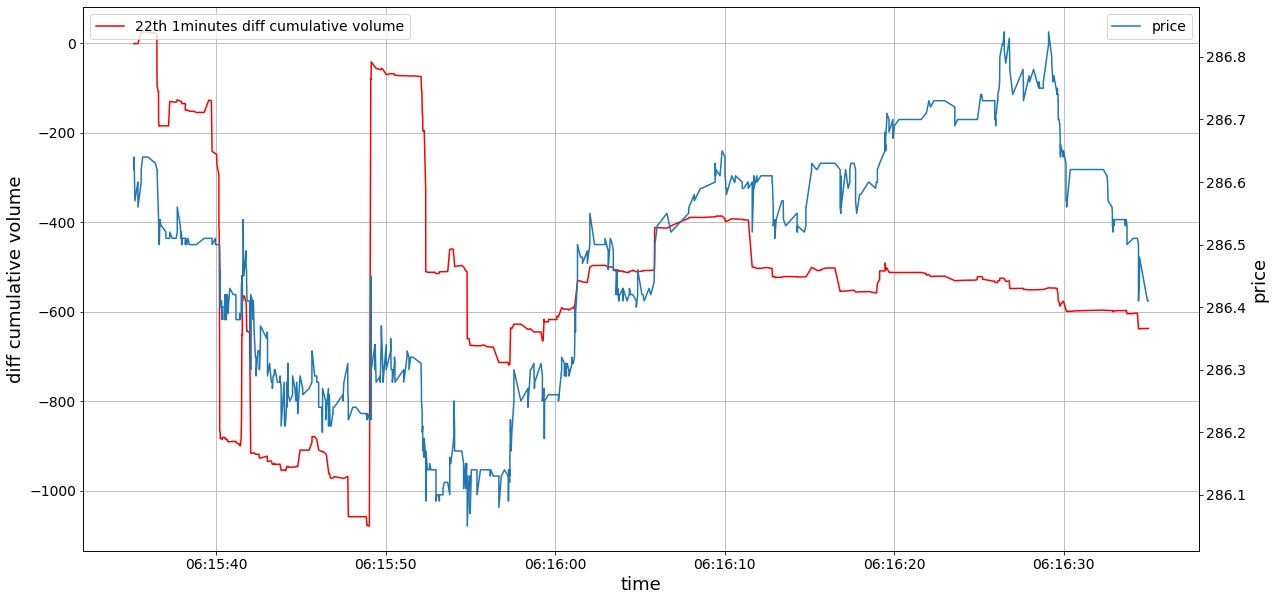

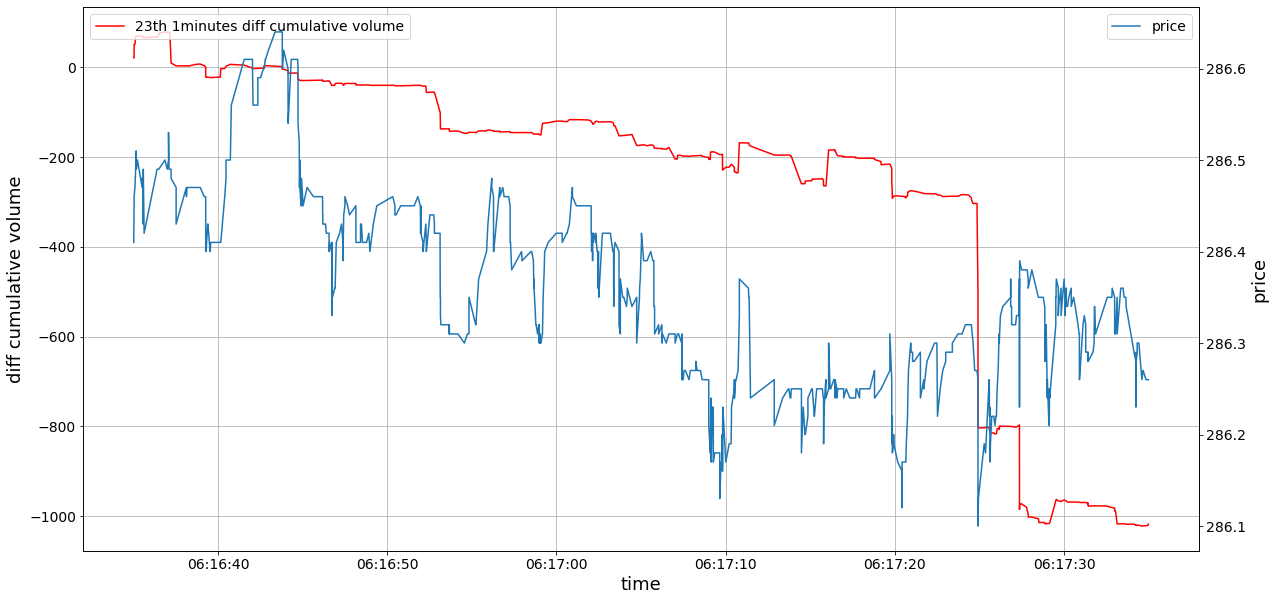

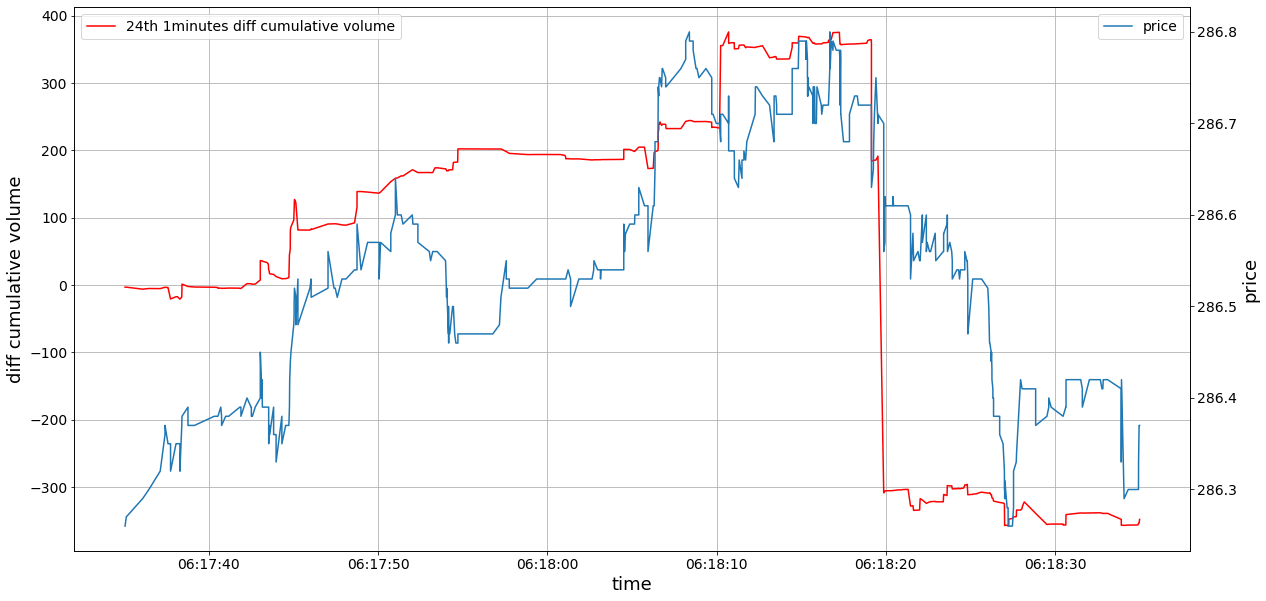

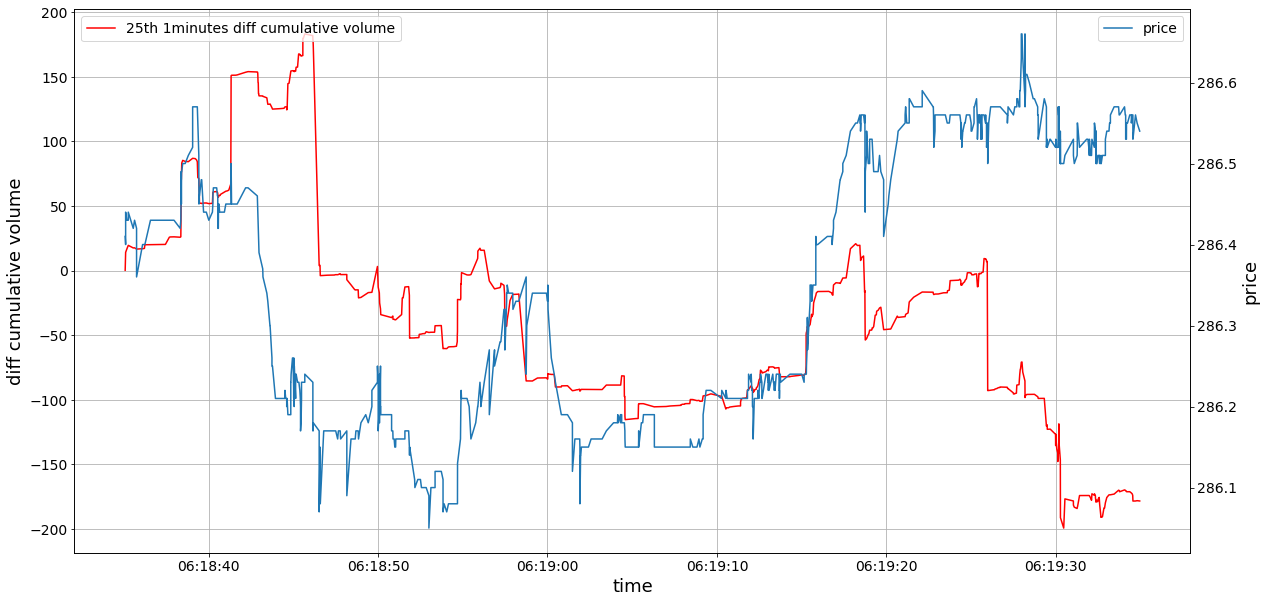

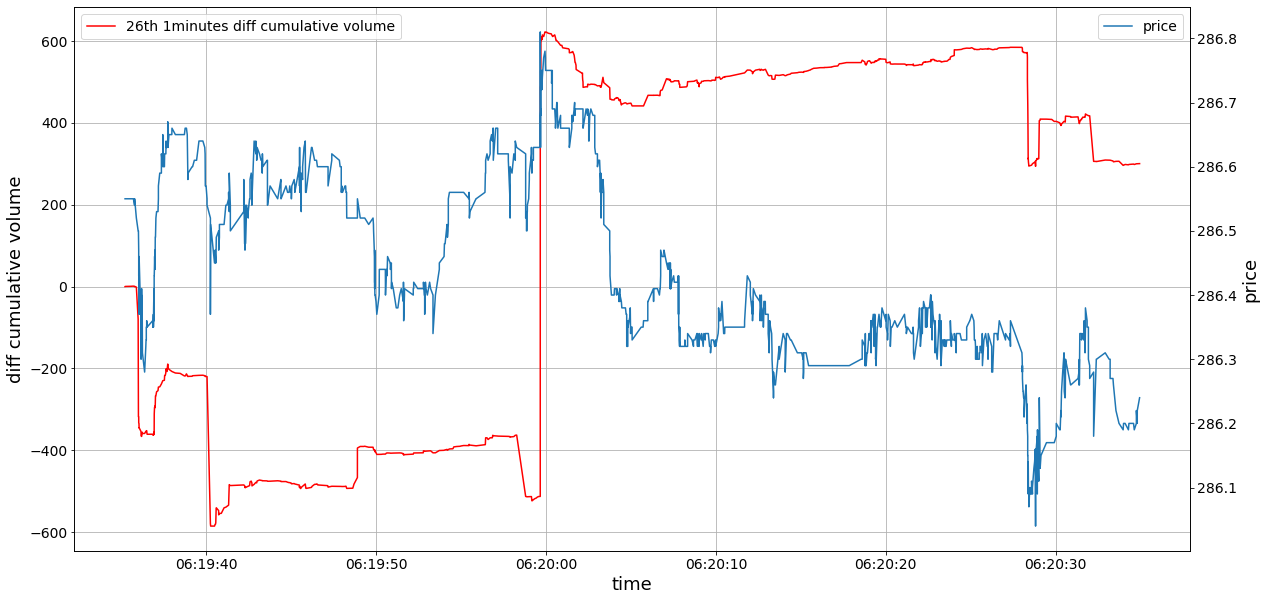

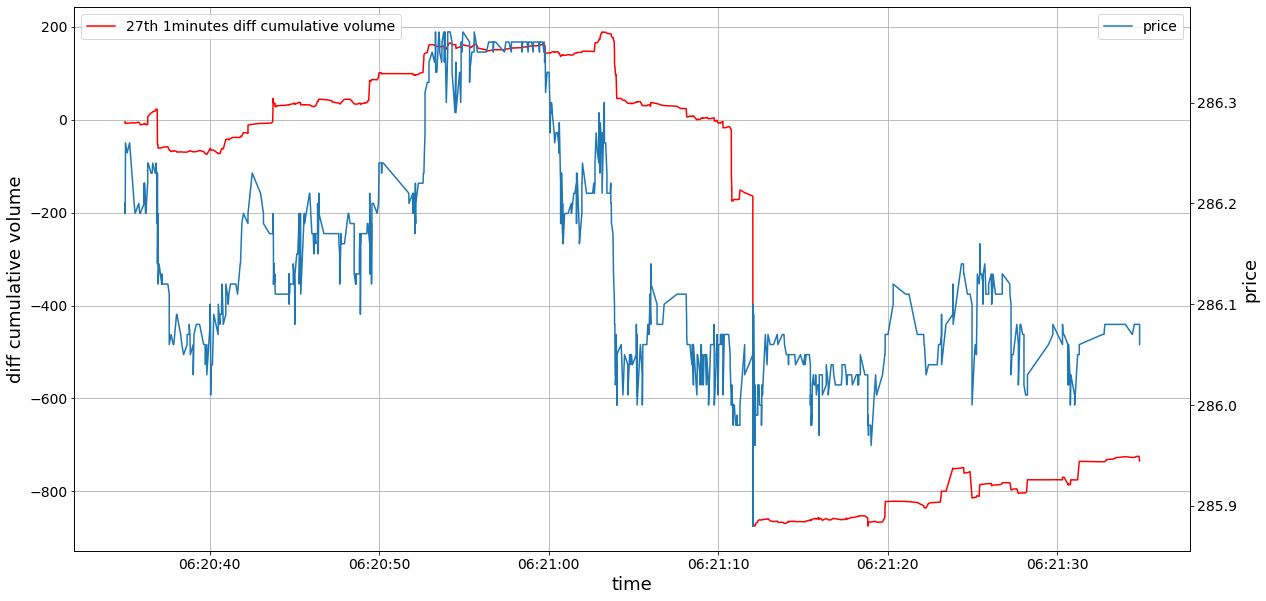

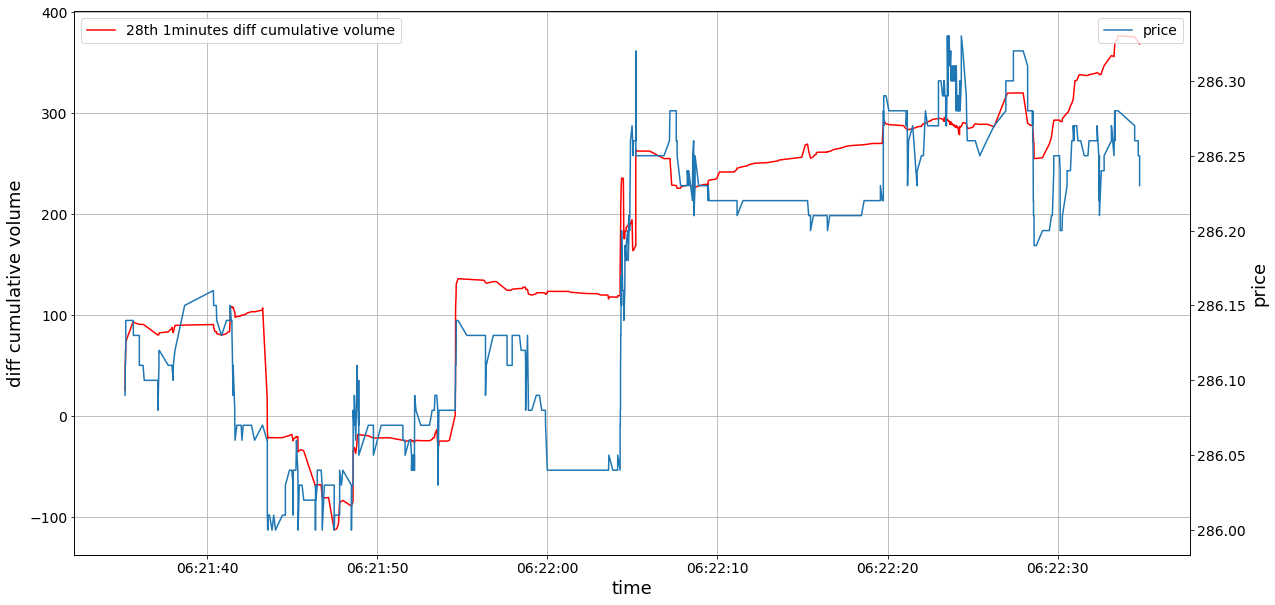

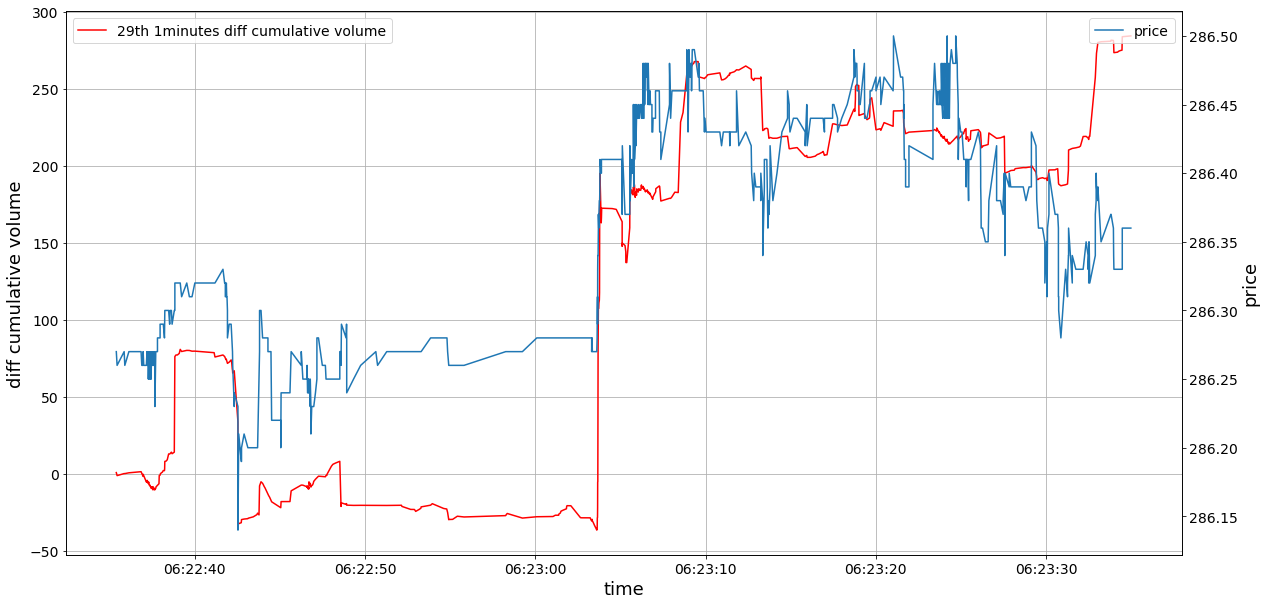

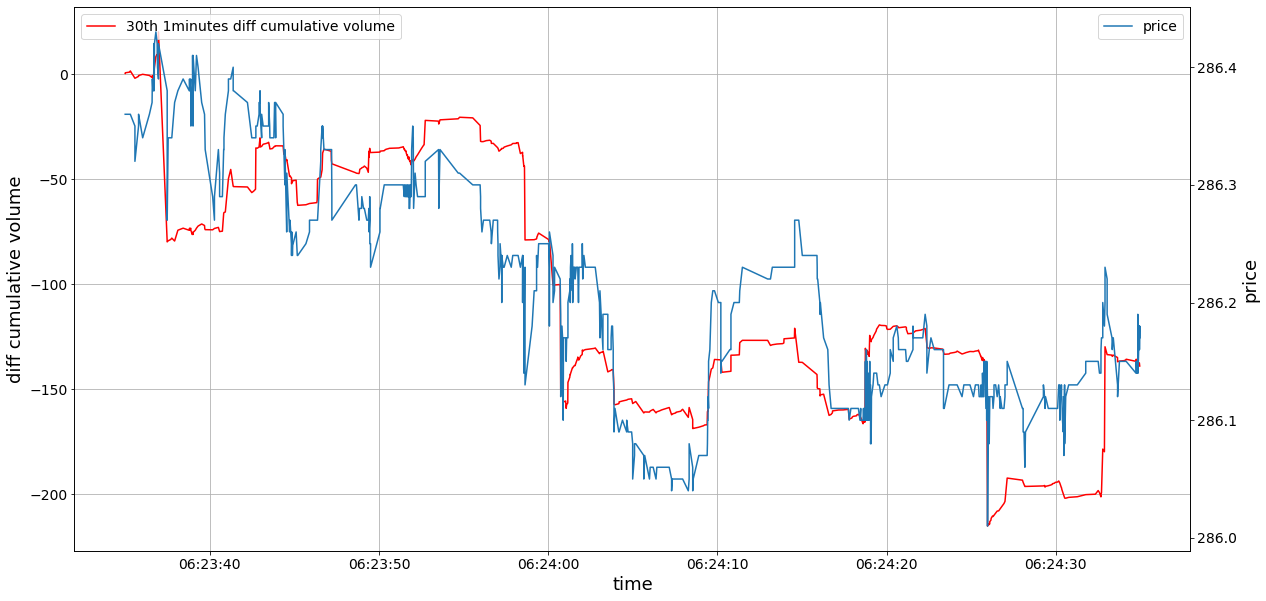

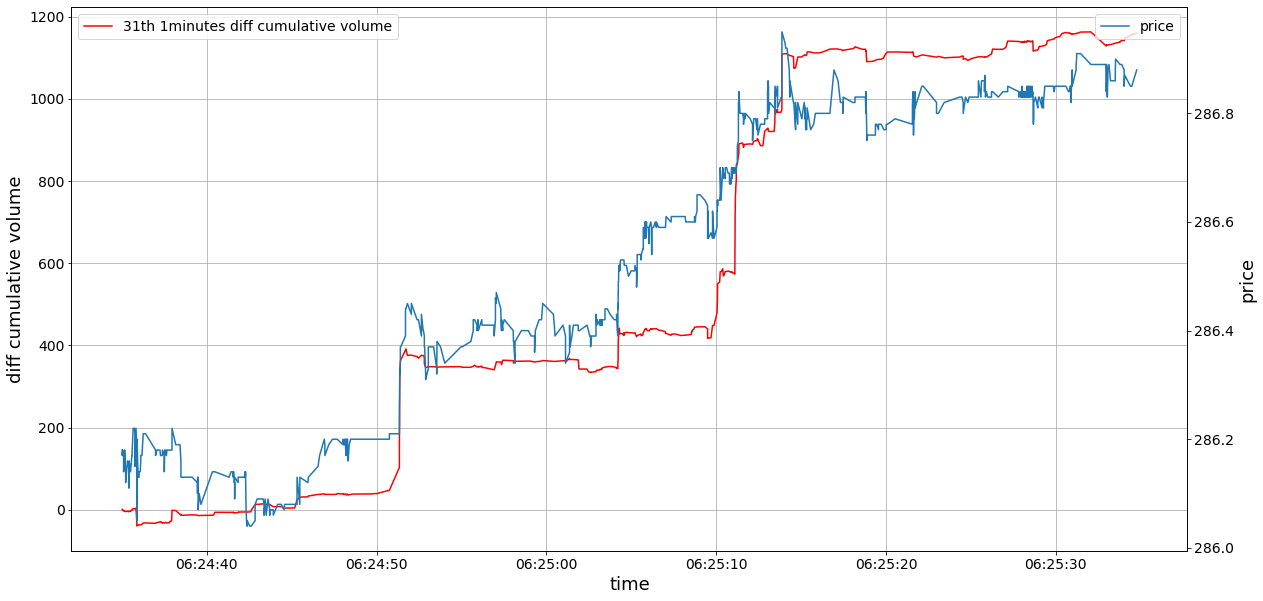

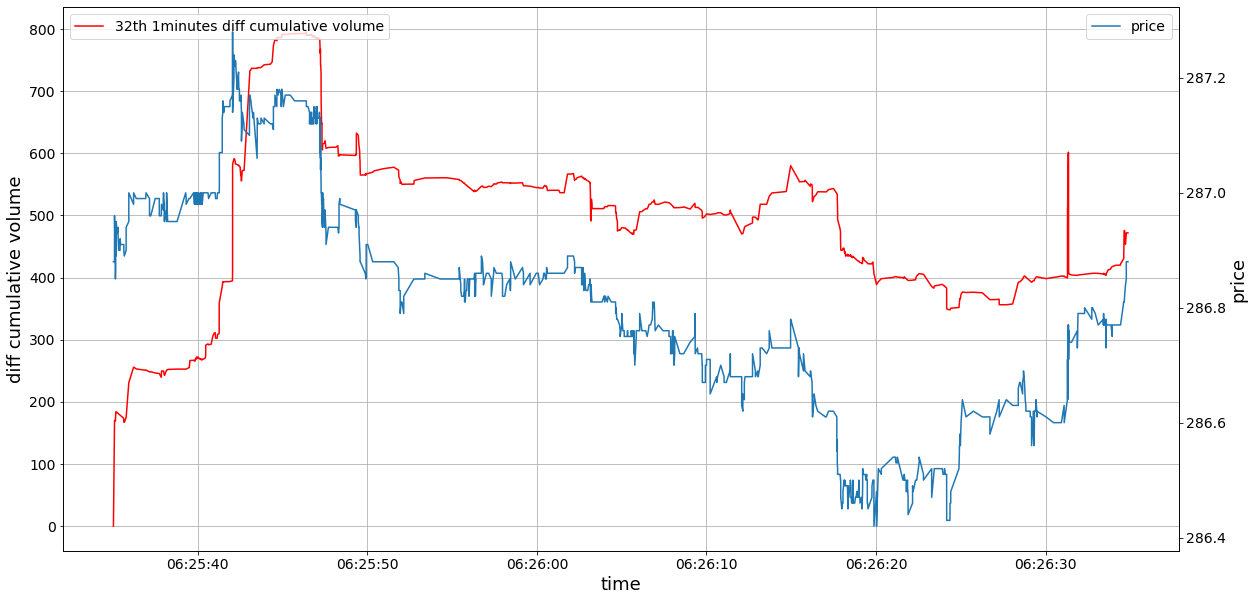

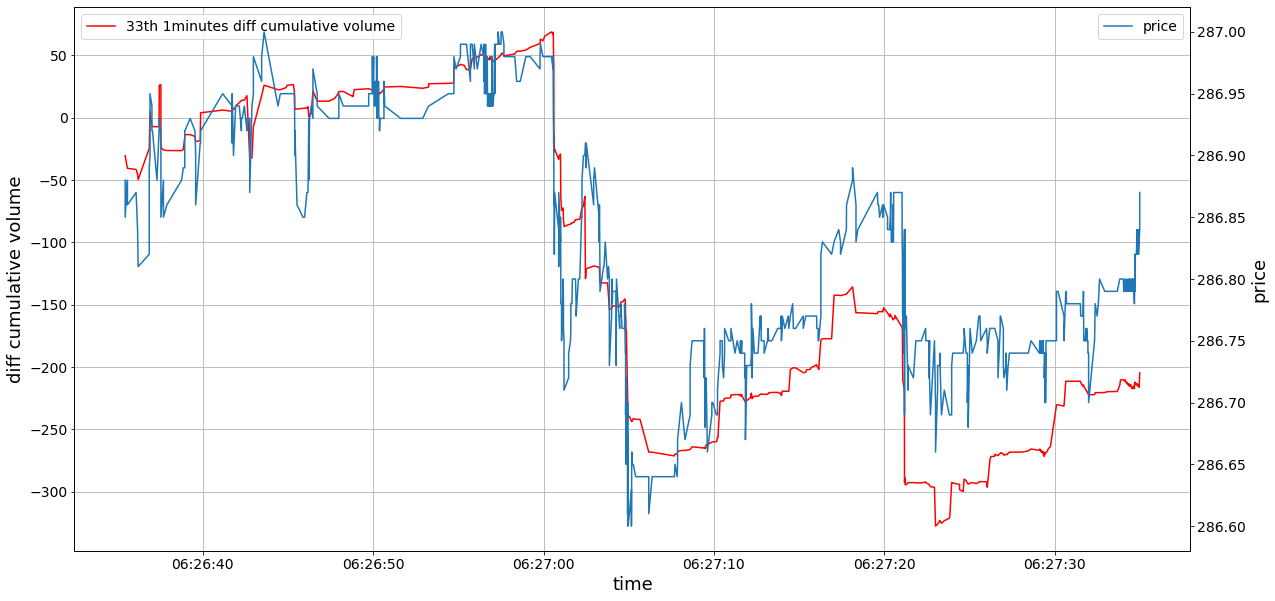

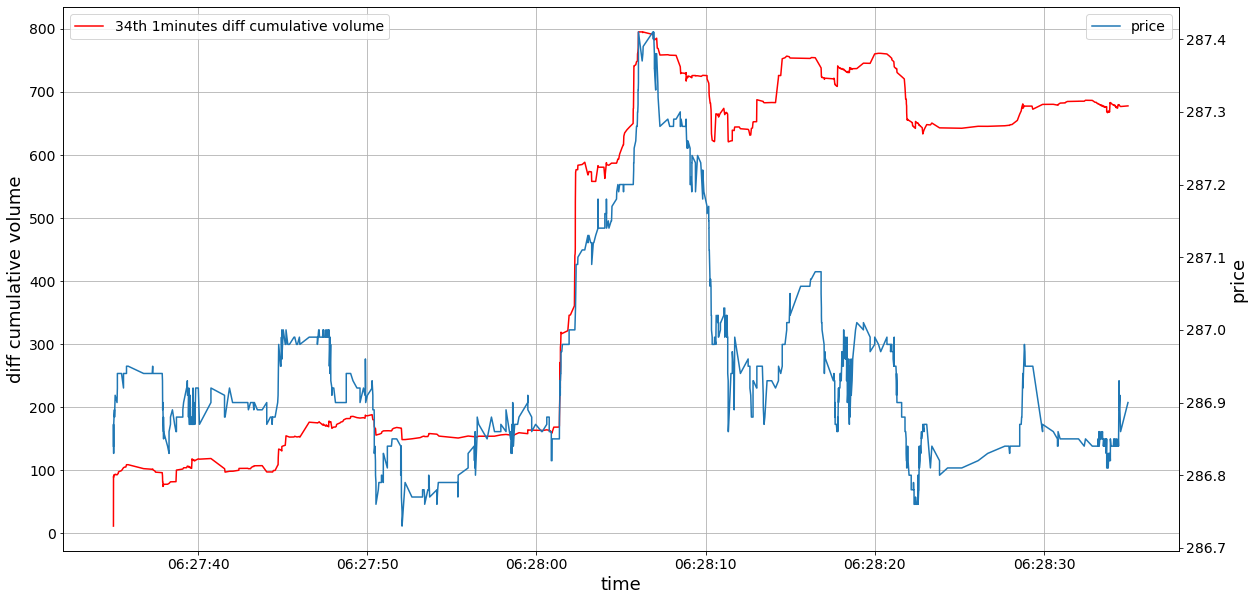

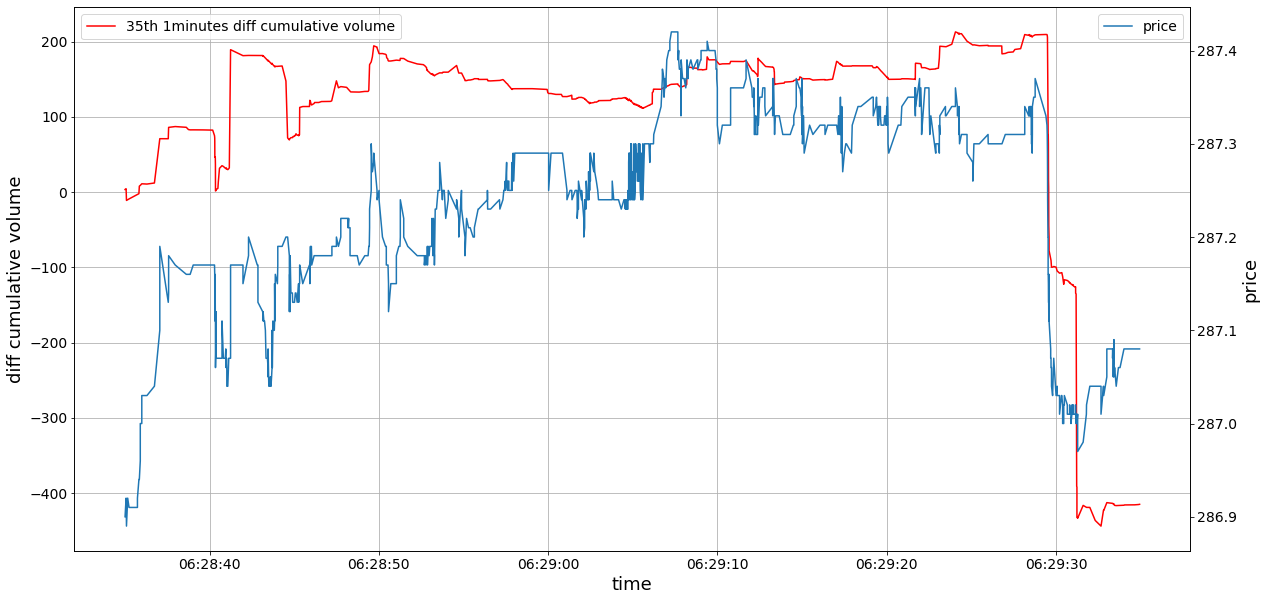

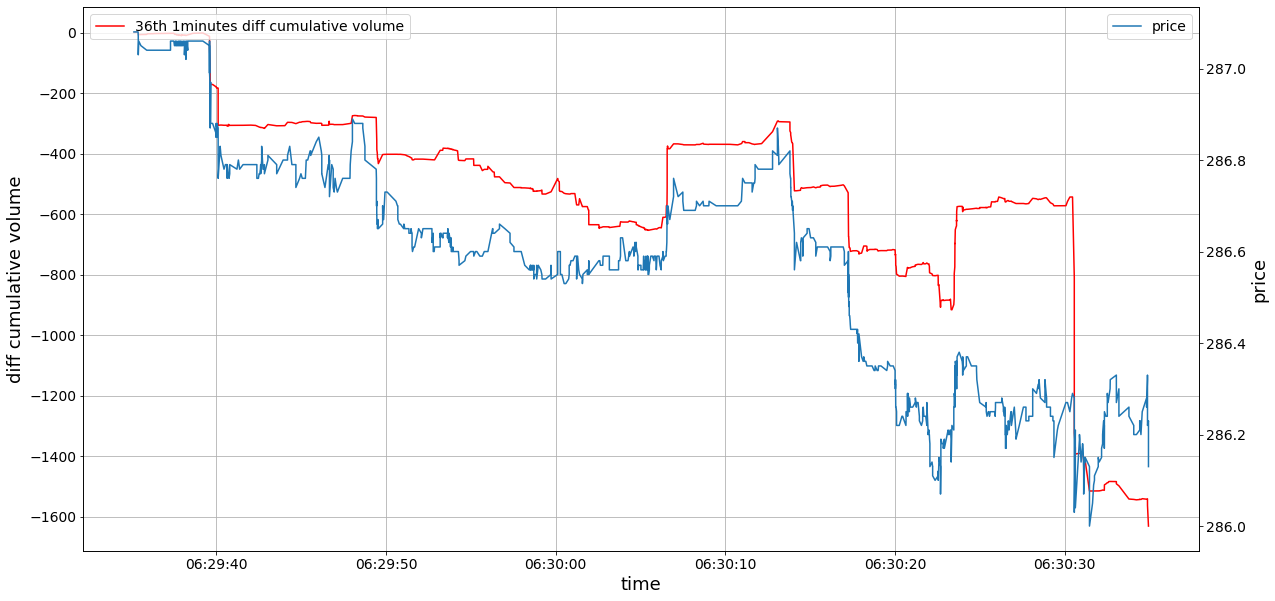

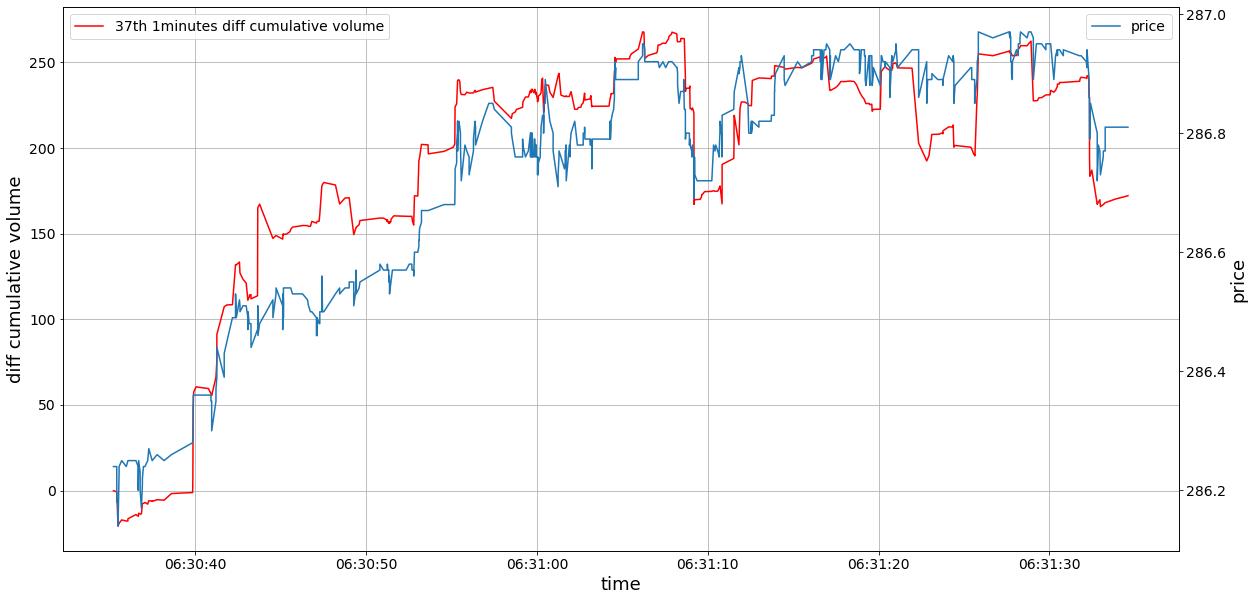

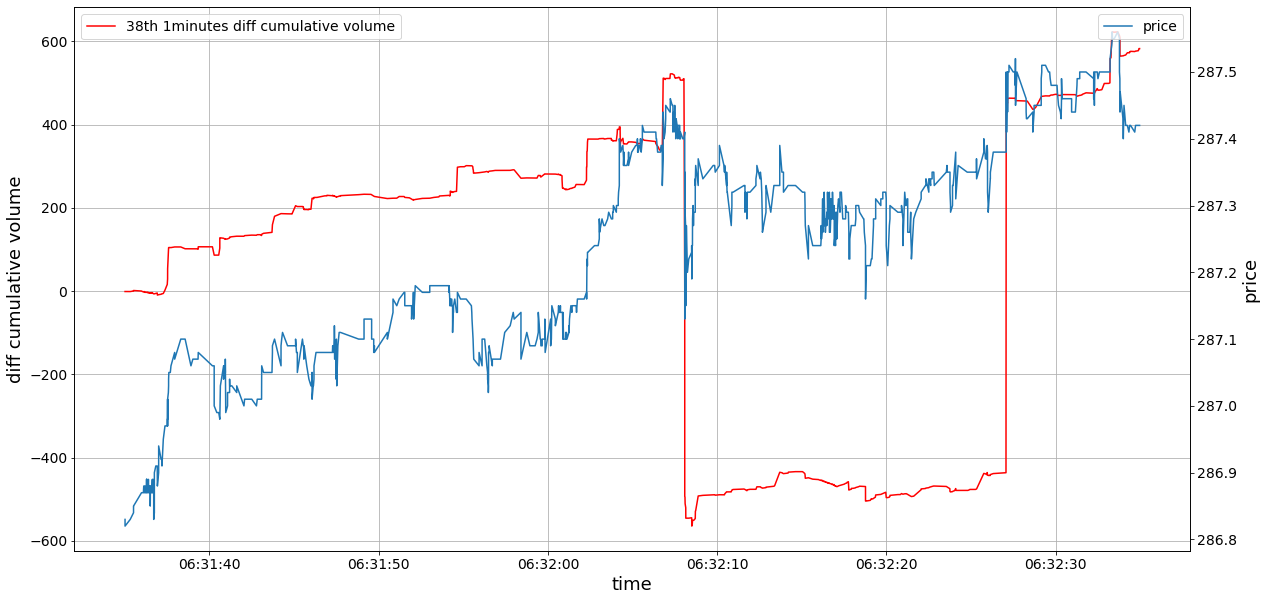

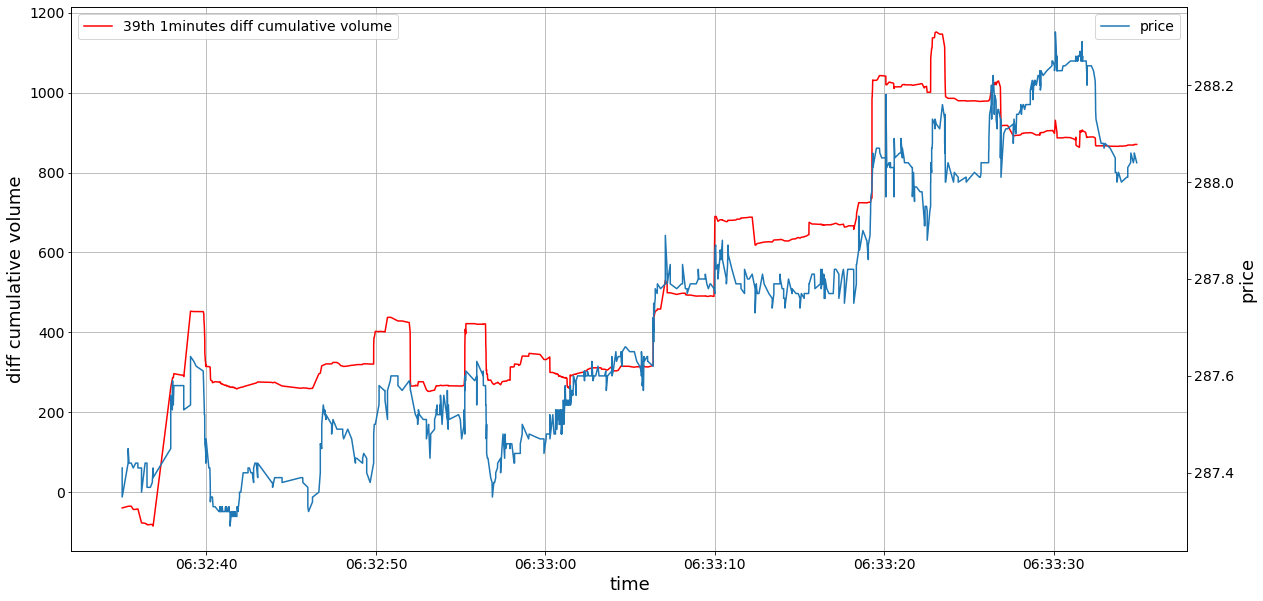

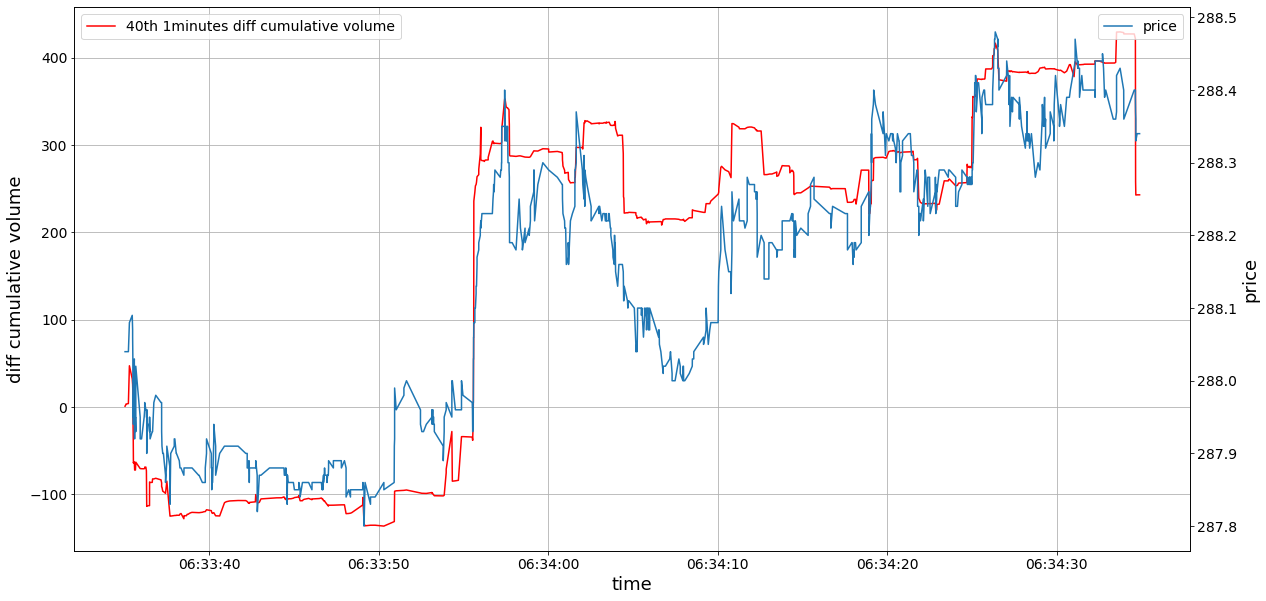

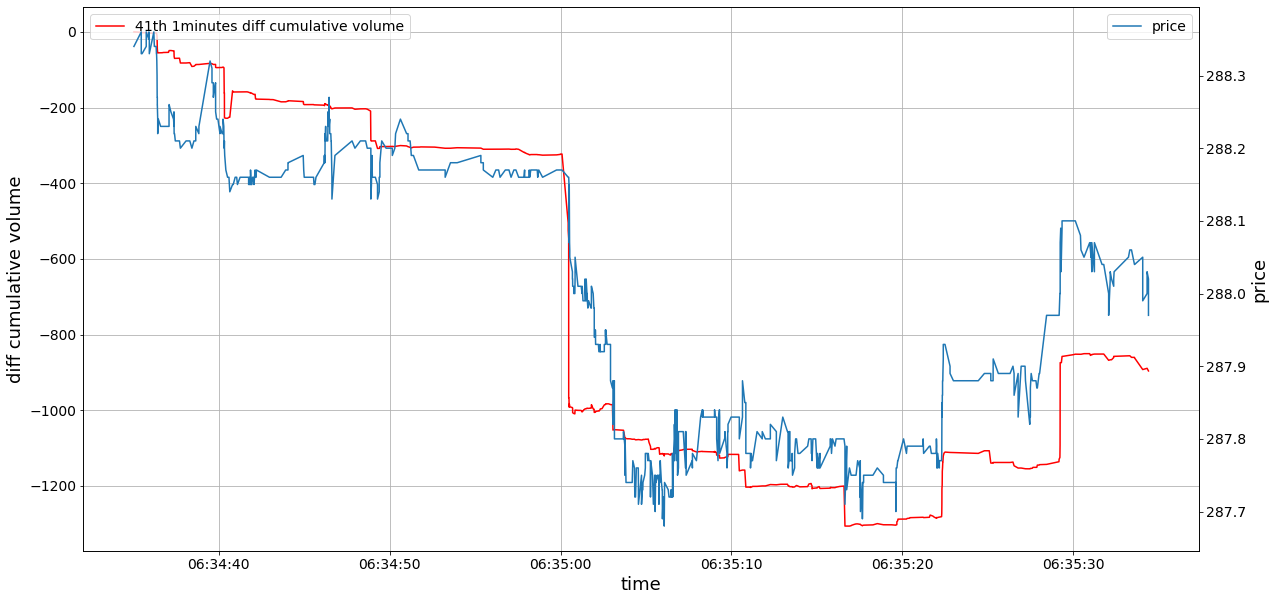

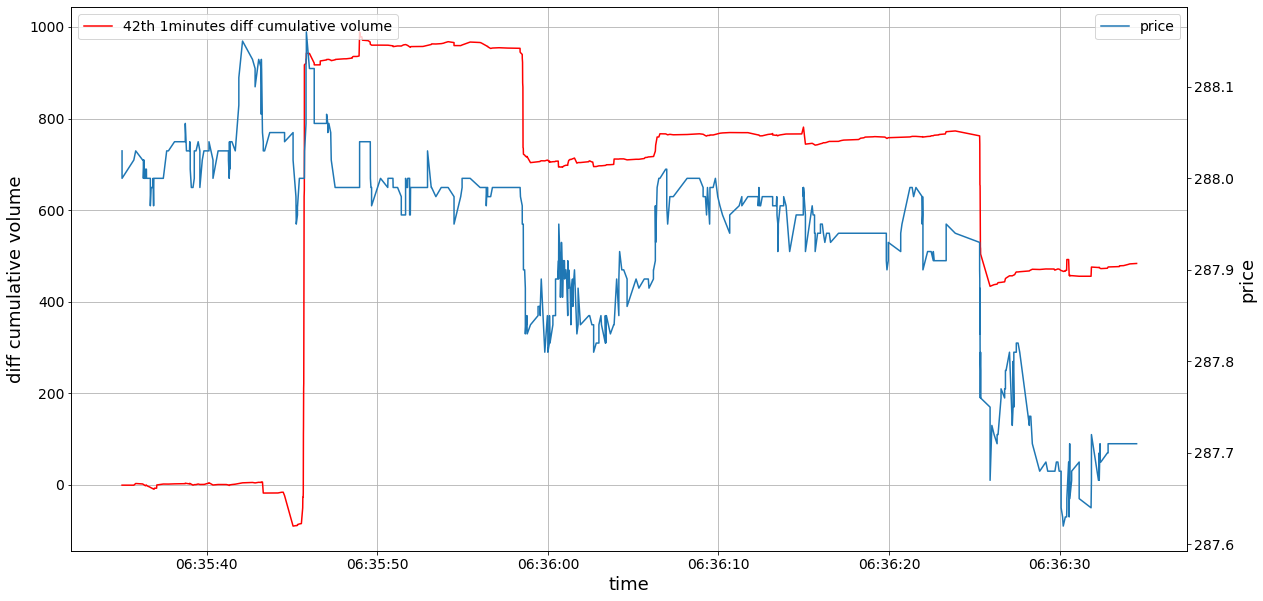

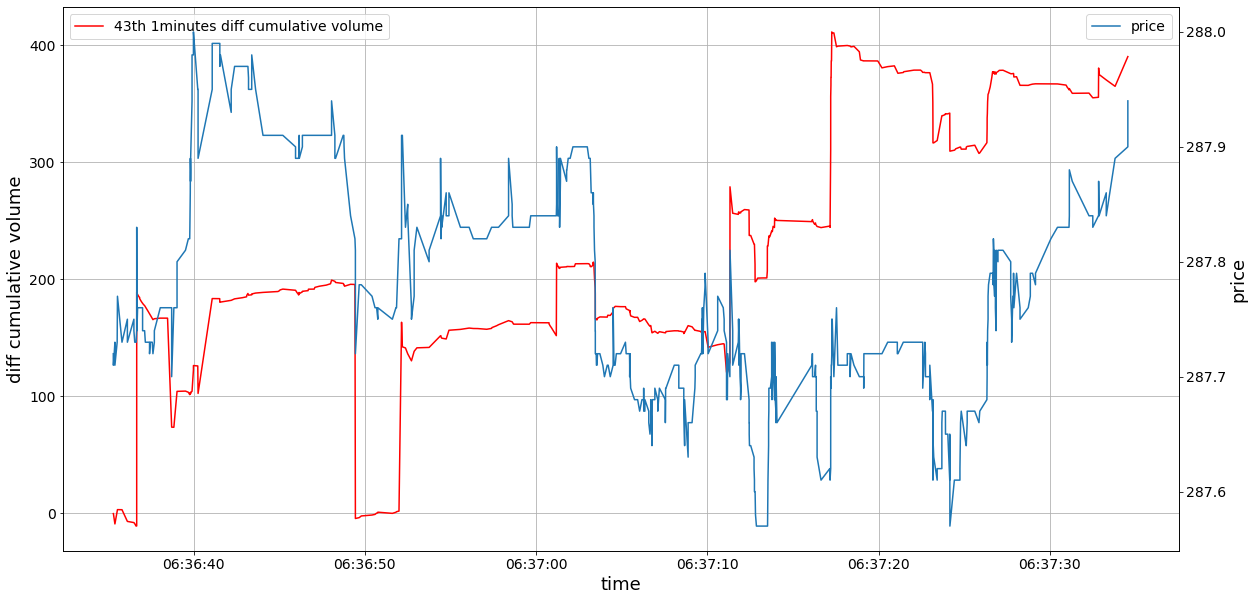

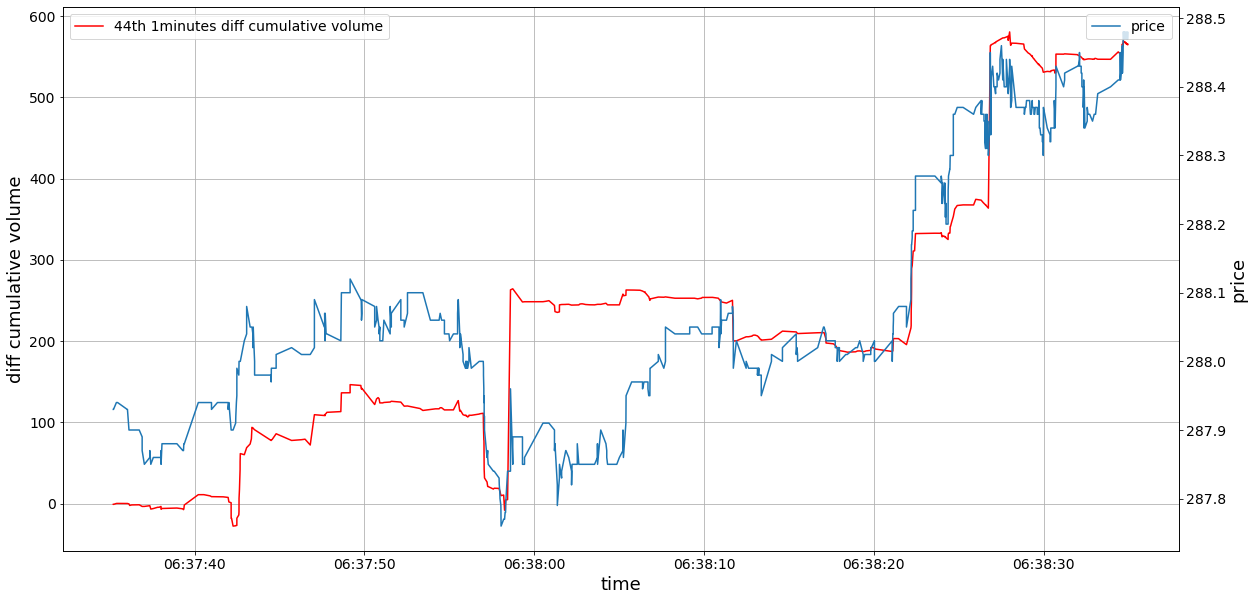

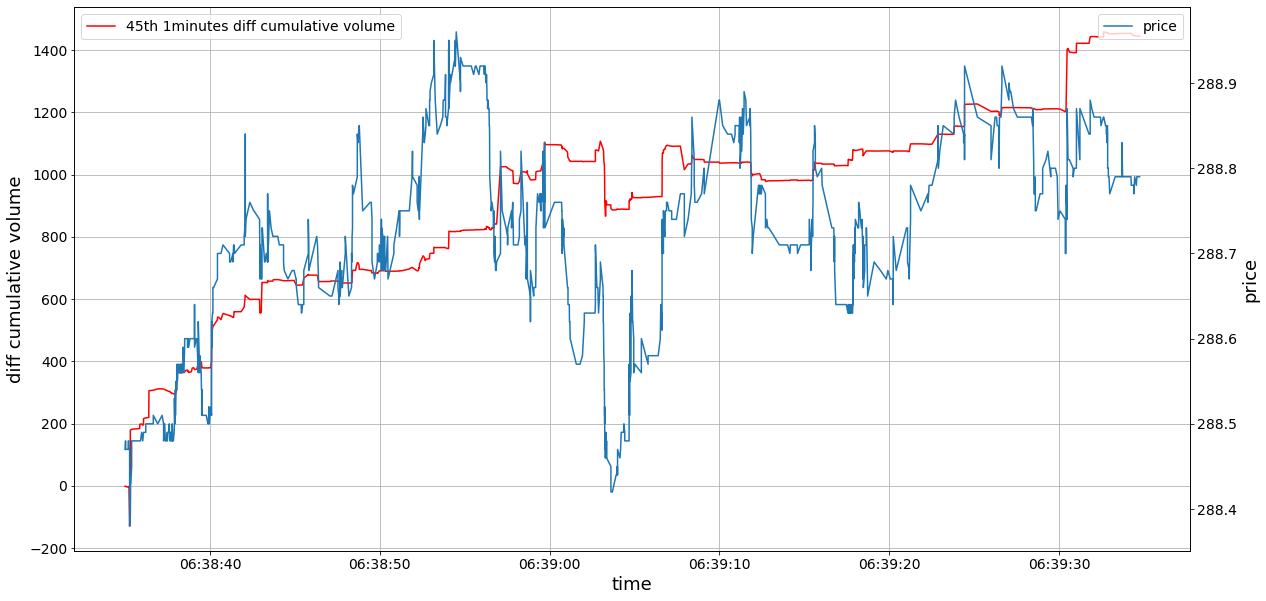

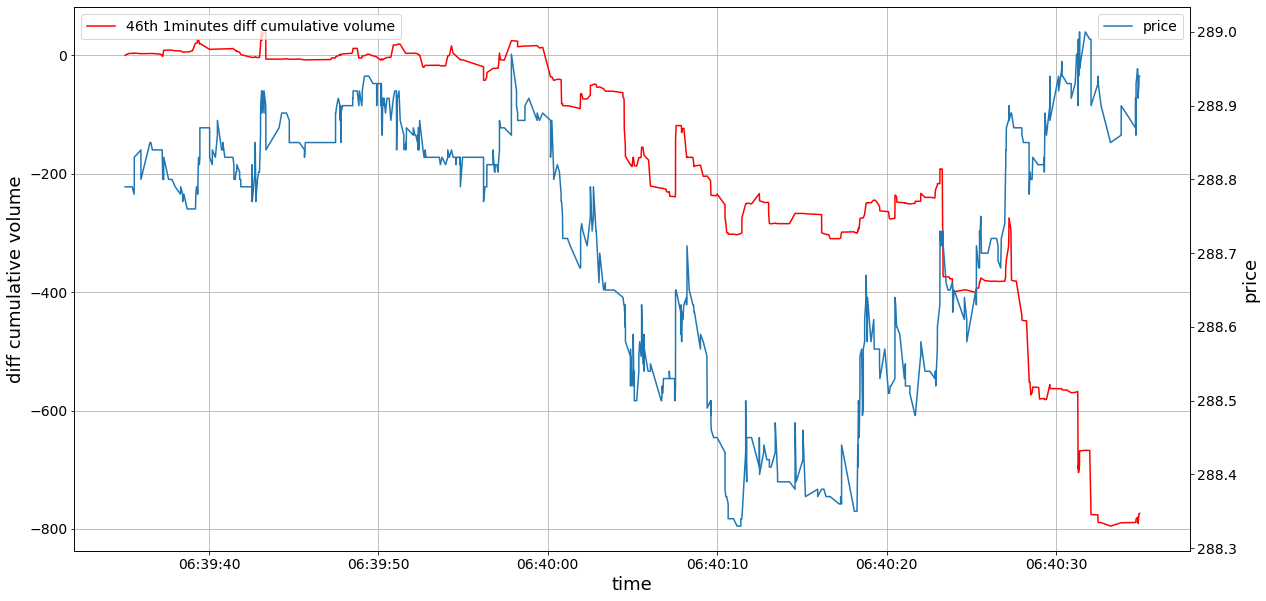

In [36]:
loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60))
for i in range(loop_times):
    plot_on_queue_interval_and_diff_volume(interval=1, unit='minutes', queue=i+1)

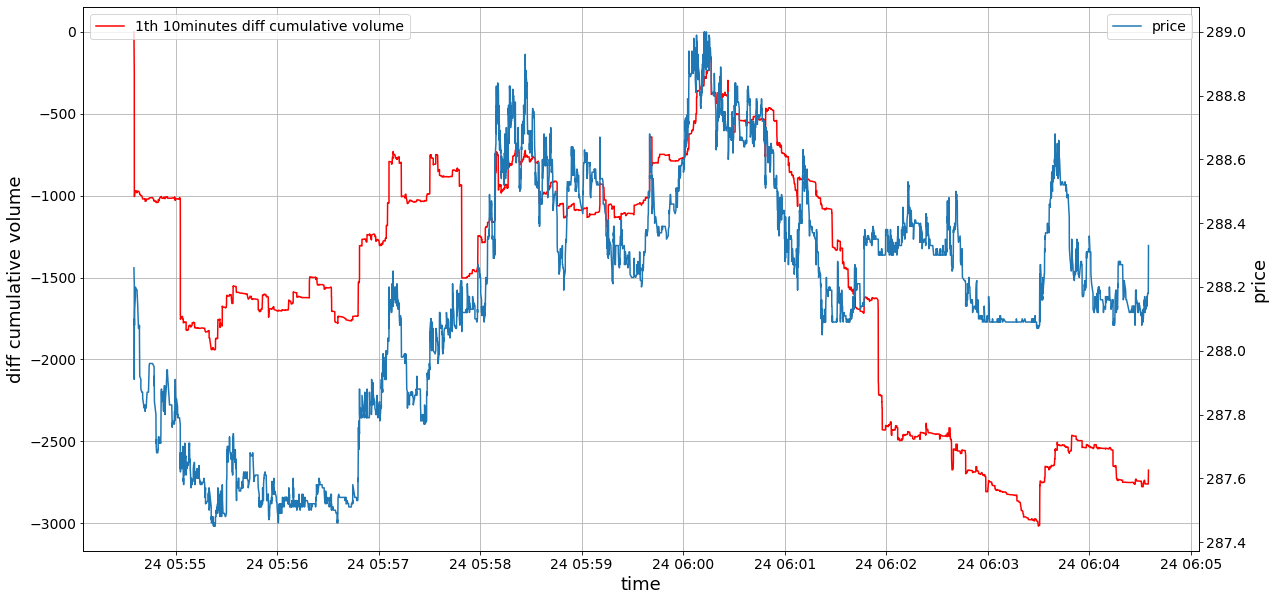

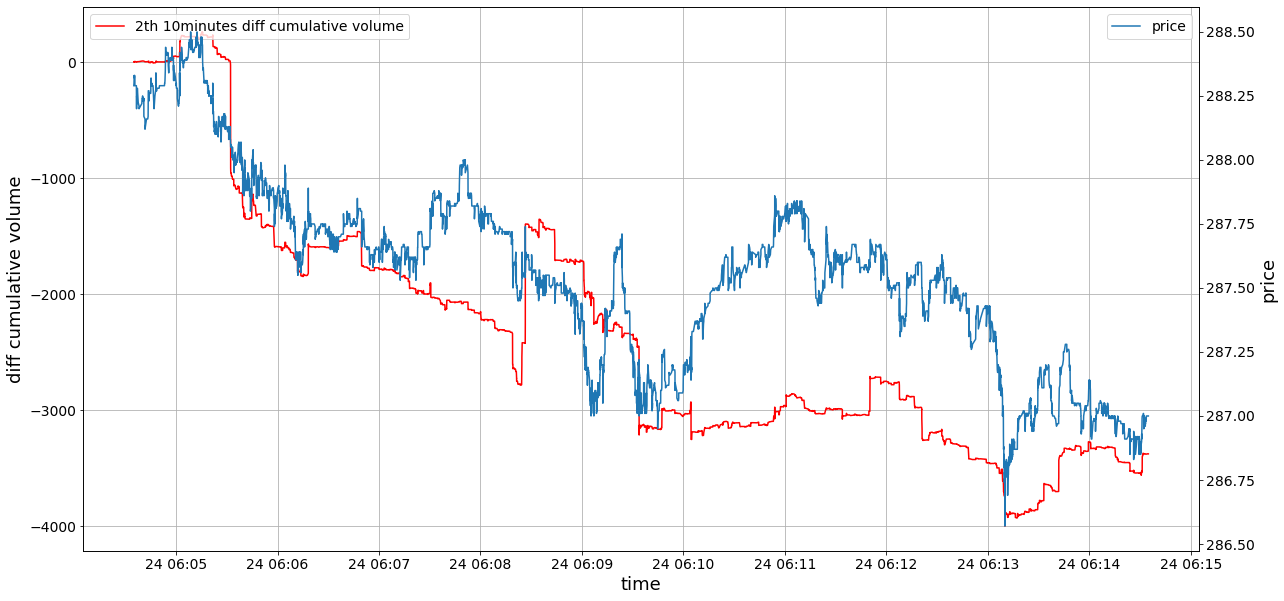

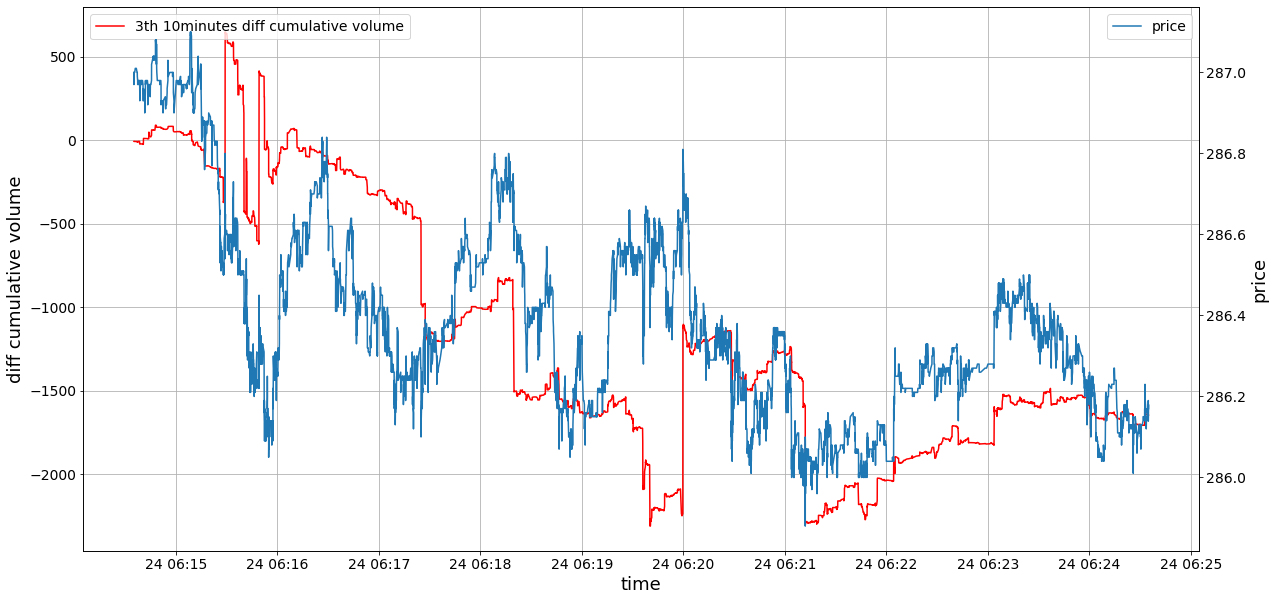

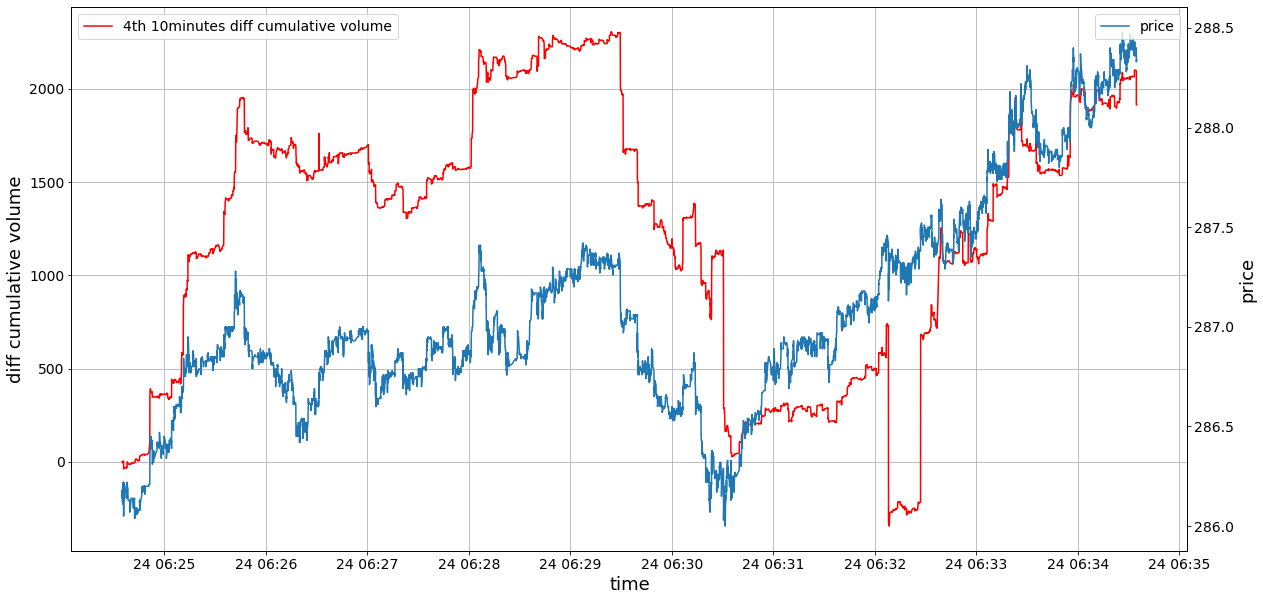

没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。
没有此时间段的数据。


In [37]:
loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60))
for i in range(loop_times):
    plot_on_queue_interval_and_diff_volume(interval=10, unit='minutes', queue=i+1)

In [38]:
def plot_on_signal_interval_and_diff_volume( signal_interval=1, position_interval=4, unit='minutes', queue=1):
    
    signal_start_time = df.index[0]
    position_start_time = df.index[1]
    
    if unit == 'days':
        signal_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=signal_interval)
        position_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(days=position_interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60*24))
        if queue * interval > loop_times:
            print('没有此时间段的数据。')
    elif unit == 'hours':
        signal_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(hours=signal_interval)
        position_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(hours=position_interval)
        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / (60*60))
        if queue * interval > loop_times:
            print('没有此时间段的数据。')
    elif unit == 'minutes':
        signal_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(minutes=signal_interval)
        position_end_time = datetime.datetime.strptime(str(start_time)[0:10], '%Y-%m-%d') + datetime.timedelta(minutes=position_interval)        loop_times = round((time.mktime(df.index.max().timetuple()) - time.mktime(df.index.min().timetuple())) / 60)
        if queue * interval > loop_times:
            print('没有此时间段的数据。')            

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()
    plt.grid()

    for i in range(queue):         
        signal_unit_data = df.truncate(signal_start_time, signal_end_time)
        signal_unit_data['cumulative_volume'] = signal_unit_data['volume'].groupby(signal_unit_data['isBuyerMaker']).cumsum()
        
        signal_sell_data = signal_unit_data.loc[signal_unit_data['isBuyerMaker']==True][['cumulative_volume']]
        signal_sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        signal_buy_data = signal_unit_data.loc[signal_unit_data['isBuyerMaker']==False][['cumulative_volume']]
        signal_buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        signal_data = pd.merge(signal_sell_data, signal_buy_data, how='outer', left_index=True, right_index=True)
        signal_data.fillna(method='ffill', inplace=True)
        signal_data.fillna(0, inplace=True)
        signal_data.reset_index(inplace=True)
        signal_data.drop_duplicates('time', keep='last', inplace=True)
        signal_data.set_index('time', inplace=True)
        signal_data['diff_cumulative_volume'] = signal_data['buy_cumulative_volume'] - signal_data['sell_cumulative_volume']
        
        position_unit_data = df.truncate(position_start_time, position_end_time)
        position_unit_data['cumulative_volume'] = position_unit_data['qty'].groupby(position_unit_data['isBuyerMaker']).cumsum()
        
        position_sell_data = position_unit_data.loc[position_unit_data['isBuyerMaker']==True][['cumulative_volume']]
        position_sell_data.rename(columns={'cumulative_volume': 'sell_cumulative_volume'}, inplace=True)
        position_buy_data = position_unit_data.loc[position_unit_data['isBuyerMaker']==False][['cumulative_volume']]
        position_buy_data.rename(columns={'cumulative_volume': 'buy_cumulative_volume'}, inplace=True)
        
        position_data = pd.merge(position_sell_data, position_buy_data, how='outer', left_index=True, right_index=True)
        position_data.fillna(method='ffill', inplace=True)
        position_data.fillna(0, inplace=True)
        position_data.reset_index(inplace=True)
        position_data.drop_duplicates('time', keep='last', inplace=True)
        position_data.set_index('time', inplace=True)
        position_data['diff_cumulative_volume'] = position_data['buy_cumulative_volume'] - position_data['sell_cumulative_volume']
        
        
        if i == queue - 1:
            if unit == 'days':
                ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'days ' + 'diff cumulative volume')
                plt.legend(loc='upper left', fontsize=14)
            elif unit == 'hours':
                ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'hours ' + 'diff cumulative volume')
                plt.legend(loc='upper left', fontsize=14) 
            elif unit == 'minutes':
                ax.plot(data['diff_cumulative_volume'], 'r', label=str(i+1) + 'th ' + str(interval) + 'minutes ' + 'diff cumulative volume')
                plt.legend(loc='upper left', fontsize=14)

            plt.xlabel('time', size=18)
            plt.ylabel('diff cumulative volume', size=18)
            plt.xticks(size=14)
            plt.yticks(size=14)
            ax1 = ax.twinx()
            ax1.plot(df['price'].loc[start_time:end_time], label='price')
            plt.legend(loc='upper right', fontsize=14)
            plt.xlabel('time', size=18)
            plt.ylabel('price', size=18)
            plt.xticks(size=14)
            plt.yticks(size=14)
            plt.show()

        start_time = end_time
        if unit == 'days':
            end_time += datetime.timedelta(days=interval)
        elif unit == 'hours':
            end_time += datetime.timedelta(hours=interval)
        elif unit == 'minutes':
            end_time += datetime.timedelta(minutes=interval)

SyntaxError: ignored